In [2]:
import os

In [3]:
import pandas as pd
import rdkit
from rdkit import Chem

RDKit WARNING: [11:39:11] Enabling RDKit 2019.09.3 jupyter extensions


In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
from collections import Counter

In [8]:
from scipy import stats

In [9]:
from rdkit.Chem.Descriptors import ExactMolWt

In [10]:
def getmol(x):
    try:
        mol = Chem.MolFromSmiles(x)
        return mol
    except:
        return None
    
def getinchi(x):
    try:
        mol = Chem.MolFromSmiles(x)
        return Chem.MolToInchi(mol)
    except:
        return None

def getRB(x):
    try:
        mol = Chem.MolFromSmiles(x)
        return rdkit.Chem.rdMolDescriptors.CalcNumRotatableBonds(mol)
    except:
        return None

def getMW(x):
    try:
        mol = Chem.MolFromSmiles(x)
        return ExactMolWt(mol)
    except:
        return None
    
def r2(x, y):
    #print(stats.pearsonr(x, y)[0])
    return stats.pearsonr(x, y)[0] ** 2

def getEle(smilist):
    eles = set()
    for smi in smilist:
        mol = Chem.MolFromSmiles(smi)
        elelist = list(Counter(atom.GetSymbol() for atom in mol.GetAtoms()).keys())
        for ele in elelist:
            #for e in ele:
            eles.add(ele)
    return eles

def filterdf(smilist):
    filters = []
    for smi in smilist:
        mol = Chem.MolFromSmiles(smi)
        elelist = list(Counter(atom.GetSymbol() for atom in mol.GetAtoms()).keys())
        for ele in elelist:
            if ele in ['Br', 'C', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S', 'H']:
                temp = True
            else:
                temp = False
                break
        filters.append(temp)
    return filters

def addInfo(df):
    assert 'SMILES' in list(df.columns)
    df['Mol'] = df['SMILES'].apply(lambda x: getmol(x))
    df = df[~pd.isnull(df['Mol'])].reset_index(drop=True)
    
    df['InChI'] = df['SMILES'].apply(lambda x: getinchi(x))
    df['RB'] = df['SMILES'].apply(lambda x: getRB(x))
    df['MW'] = df['SMILES'].apply(lambda x: getMW(x))
    ele_ = getEle(df['SMILES'])
    
    return df, ele_

def getStats(df):
    return df.describe().loc[['mean','std', 'min', 'max']]

def getFigs(df, properName, save=False, savepath=None, savename=None):
    f1 = plt.figure(figsize=(10,10))
    ax1 = f1.add_subplot(111)
    sns.distplot(df[properName], ax=ax1)
    ax1.set_xlabel(properName, fontsize=25)
    ax1.set_ylabel('Density', fontsize=25)
    ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
    ax1.xaxis.labelpad = 20
    plt.tight_layout()
    if save:
        f1.savefig(os.path.join(savepath, savename), format='svg', dpi=1200)

def group(df, identifier):
    df1 = df.groupby(identifier).mean()
    df1['InChI'] = df1.index
    df1['SMILES'] = df.groupby(identifier).max()['SMILES']
    df1.index = range(df1.shape[0])
    return df1

Tasks: 
- Analyze each dataset, including data distribution, element distribution.
- Compare experimental data between FreeSol and MinnesotaSol
- Compare theoretical and experimental data in terms of correlations. 

###### 11/11/2020

# Section 1. Experimental dataset

## 1. Free Solvation Database

In [345]:
freesol = pd.read_csv('../freesol_processed.csv', names=['SMILES', 'Sol'])

In [346]:
freesol.shape

(640, 2)

In [347]:
freesol_use, eleDis = addInfo(freesol)

RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearranged
RDKit WARNING: [16:29:16] WARNING: Charges were rearrang

In [107]:
freesol_use.head()

,SMILES,Sol,InChI,RB,MW
0,CCCCC[N+](=O)[O-],-2.82,"InChI=1S/C5H11NO2/c1-2-3-4-5-6(7)8/h2-5H2,1H3",4,117.078979
1,CCCCCCBr,0.18,"InChI=1S/C6H13Br/c1-2-3-4-5-6-7/h2-6H2,1H3",4,164.020063
2,Nc1ccc(Cl)cc1,-5.90,"InChI=1S/C6H6ClN/c7-5-1-3-6(8)4-2-5/h1-4H,8H2",0,127.018877
3,O=c1[nH]cc(C(F)(F)F)c(=O)[nH]1,-15.46,"InChI=1S/C5H3F3N2O2/c6-5(7,8)2-1-9-4(12)10-3(2...",0,180.014662
4,CCCCOCCCC,-0.83,"InChI=1S/C8H18O/c1-3-5-7-9-8-6-4-2/h3-8H2,1-2H3",6,130.135765


In [108]:
eleDis

{'Br', 'C', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S'}

In [348]:
len(freesol_use['InChI']) == freesol_use.shape[0] # To testify if all the compounds are unique.

True

In [349]:
getStats(freesol_use)

,Sol,RB,MW
mean,-3.816922,1.632812,138.942432
std,3.845010,1.973498,72.082176
min,-25.470000,0.000000,17.026549
max,3.430000,12.000000,493.688527


In [350]:
stats = getStats(freesol_use)

In [206]:
stats

,Sol,RB,MW
mean,-3.816922,1.632812,138.942432
std,3.845010,1.973498,72.082176
min,-25.470000,0.000000,17.026549
max,3.430000,12.000000,493.688527


In [351]:
freesol_use.to_csv('./freesol_processed_use.csv', index=False)

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


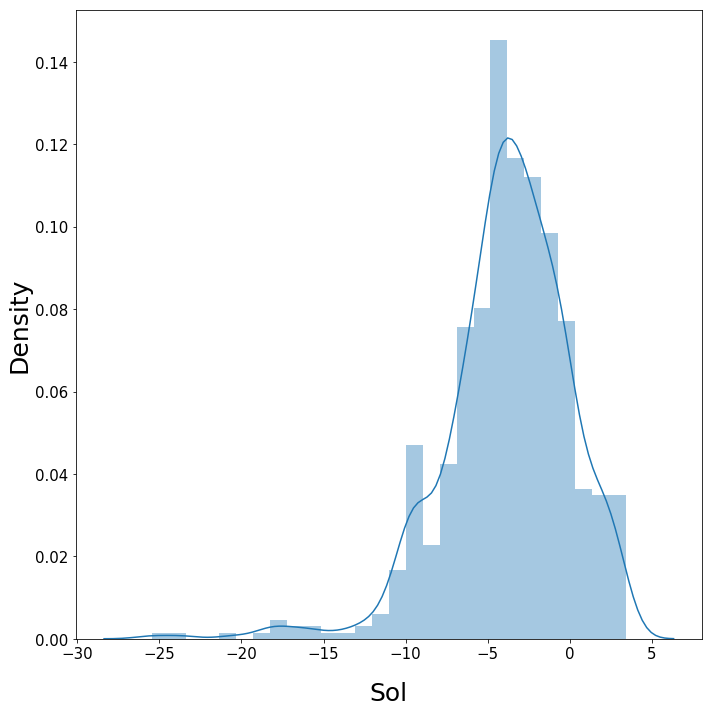

In [267]:
getFigs(freesol_use, 'Sol', save=True, savepath='./solvation_summary/', savename='Freesol.svg')

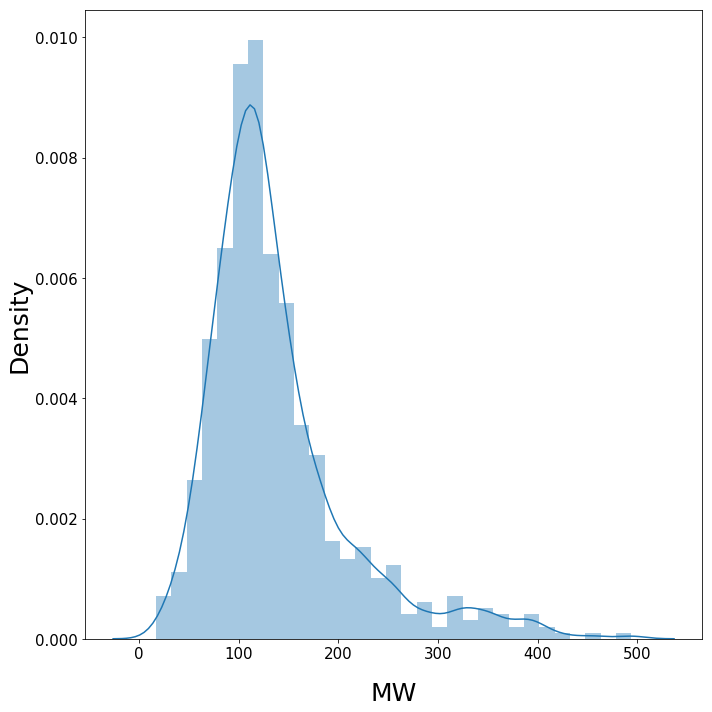

In [268]:
getFigs(freesol_use, 'MW', save=True, savepath='./solvation_summary/', savename='Freesol_mw.svg')

## 2. Minnesota Solvation Database

In [12]:
minne = pd.read_csv('../database/MNSol_all_rev.csv')

In [13]:
minne.head()

,FileHandle,Smiles,SoluteName,Formula,Subset,Charge,Level1,Level2,Level3,Solvent,...,OSi,P,HP,OP,S,HS,OS,SP,SS,TotalArea
0,0008noc,C(CCCC)CCC,n-octane,H18C8,[g],0,2,1,1,2methylpyridine,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.846
1,0008noc,C(CCCC)CCC,n-octane,H18C8,[g],0,2,1,1,aceticacid,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.846
2,0008noc,C(CCCC)CCC,n-octane,H18C8,[g],0,2,1,1,acetonitrile,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.846
3,0008noc,C(CCCC)CCC,n-octane,H18C8,[g],0,2,1,1,acetophenone,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.846
4,0008noc,C(CCCC)CCC,n-octane,H18C8,[g],0,2,1,1,aniline,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.846


#### 2.1 Filter the neutral and in water

In [14]:
minne_use = minne[(minne['Solvent'] == 'water') & (minne['Charge'] == 0)][['FileHandle', 'SoluteName',  'Smiles', 'DeltaGsolv']].reset_index(drop=True)

In [15]:
minne_use.shape

(390, 4)

#### 2.2 Change header name

In [16]:
minne_use = minne_use.rename(columns={'Smiles': 'SMILES', 'DeltaGsolv': 'Sol'})

#### 2.3 Add InChI, RB and MW; get elements distribution

In [17]:
minne_use1, eleDis = addInfo(minne_use)

RDKit ERROR: [11:43:00] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [11:43:00] Explicit valence for atom # 16 N, 4, is greater than permitted
RDKit ERROR: [11:43:00] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [11:43:00] Explicit valence for atom # 0 C, 5, is greater than permitted
RDKit ERROR: [11:43:00] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [11:43:00] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [11:43:00] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [11:43:00] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [11:43:00] Explicit valence for atom # 3 N, 4, is greater than permitted


In [20]:
minne_use1.to_csv('../database/MNSol_processed.csv', index=False)

In [337]:
eleDis

{'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'O', 'P', 'S', 'Si'}

#### 2.4 check if there are duplicates by InChI

In [338]:
len(set(minne_use1['InChI']))

378

In [339]:
minne_use2 = group(minne_use1, 'InChI')

In [340]:
minne_use2.shape

(378, 5)

In [220]:
getStats(minne_use2)

,Sol,RB,MW
mean,-4.257050,1.526455,138.663819
std,4.335798,2.056390,83.074752
min,-20.300000,0.000000,2.015650
max,4.280000,12.000000,414.040083


#### 2.5 We filters the compounds with only {'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'O', 'P', 'S'}. 

In [341]:
minne_use3 = minne_use2[filterdf(minne_use2['SMILES'])].reset_index(drop=True)

In [342]:
minne_use3.shape

(377, 5)

In [343]:
minne_use3, eleDis = addInfo(minne_use3)

In [344]:
minne_use3.to_csv('./MNSol_processed_use.csv', index=False)

In [238]:
eleDis

{'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'O', 'P', 'S'}

In [467]:
getStats(minne_use3)

,Sol,RB,MW
mean,-4.276406,1.530504,138.798017
std,4.325177,2.057614,83.144113
min,-20.300000,0.000000,2.015650
max,4.280000,12.000000,414.040083


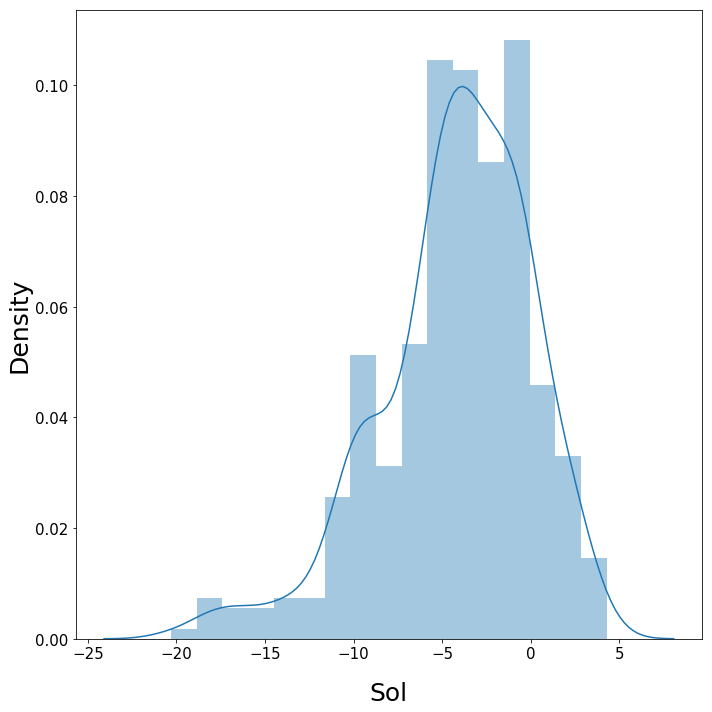

In [265]:
getFigs(minne_use3, 'Sol', save=True, savepath='./solvation_summary/', savename='Minnesota.svg')

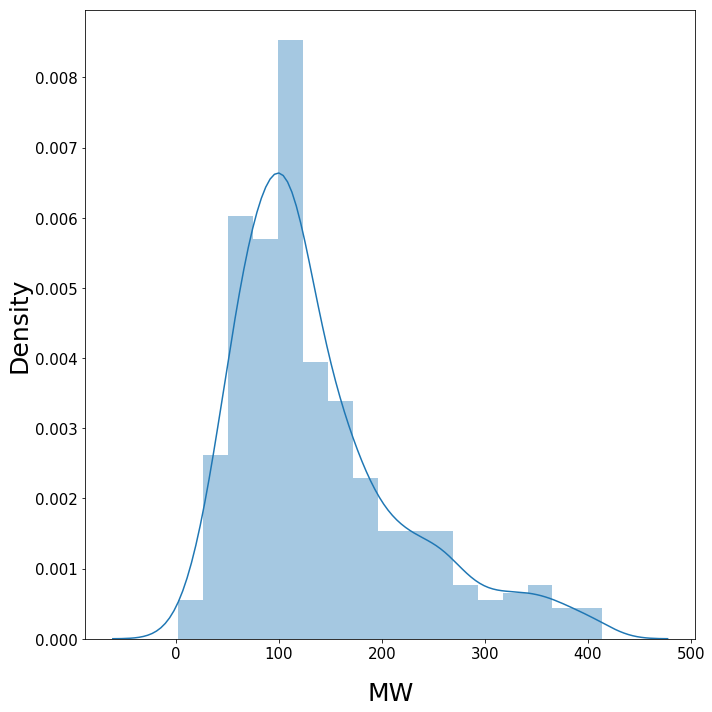

In [269]:
getFigs(minne_use3, 'MW', save=True, savepath='./solvation_summary/', savename='Minnesota_mw.svg')

## 3. Compare experimental data for common compounds in FreeSol and Minnesota. 

In [352]:
common = pd.merge(freesol_use, minne_use3, on='InChI', how='inner')

In [353]:
common.shape

(296, 11)

In [354]:
common['diff'] = abs(common['Sol_x'] - common['Sol_y'])

In [355]:
common['diff'].describe()

count    296.000000
mean       0.057061
std        0.241065
min        0.000000
25%        0.000000
50%        0.010000
75%        0.030000
max        3.040000
Name: diff, dtype: float64

In [356]:
common[common['diff'] < 1.0]['diff'].describe()

count    292.000000
mean       0.032466
std        0.085414
min        0.000000
25%        0.000000
50%        0.010000
75%        0.030000
max        0.760000
Name: diff, dtype: float64

In [357]:
common[common['diff'] > 1.0]

,SMILES_x,Sol_x,Mol_x,InChI,RB_x,MW_x,Sol_y,RB_y,MW_y,SMILES_y,Mol_y,diff
135,O=Cc1ccc(O)cc1,-8.83,<rdkit.Chem.rdchem.Mol object at 0x1a27e97670>,"InChI=1S/C7H6O2/c8-5-6-1-3-7(9)4-2-6/h1-5,9H",1,122.036779,-10.48,1,122.036779,c1(ccc(cc1)O)C=O,<rdkit.Chem.rdchem.Mol object at 0x1a27e5ed50>,1.65
212,Nc1cccc2c1C(=O)c1ccccc1C2=O,-9.44,<rdkit.Chem.rdchem.Mol object at 0x1a27e9ad00>,InChI=1S/C14H9NO2/c15-11-7-3-6-10-12(11)14(17)...,0,223.063329,-8.00,0,223.063329,c12c(cccc1N)C(=O)c1c(C2=O)cccc1,<rdkit.Chem.rdchem.Mol object at 0x1a26bbb210>,1.44
222,NN,-9.30,<rdkit.Chem.rdchem.Mol object at 0x1a27e9b490>,InChI=1S/H4N2/c1-2/h1-2H2,0,32.037448,-6.26,0,32.037448,NN,<rdkit.Chem.rdchem.Mol object at 0x1a27e7ddf0>,3.04
274,Oc1ccc(Br)cc1,-5.85,<rdkit.Chem.rdchem.Mol object at 0x1a27e9d8f0>,"InChI=1S/C6H5BrO/c7-5-1-3-6(8)4-2-5/h1-4,8H",0,171.952377,-7.13,0,171.952377,c1(ccc(cc1)Br)O,<rdkit.Chem.rdchem.Mol object at 0x1a27e5e2b0>,1.28


#### 4.1 Let's see the correlation

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


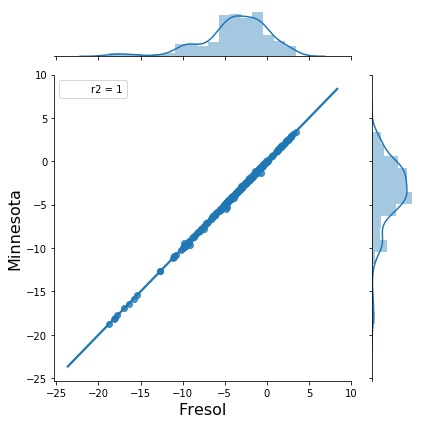

In [728]:
j = sns.jointplot(common[common['diff'] < 1.0]['Sol_x'], common[common['diff'] < 1.0]['Sol_y'], kind="reg", stat_func=r2)
j.set_axis_labels('Fresol', 'Minnesota', fontsize=16)
plt.tight_layout()
plt.show()
#j.savefig('./solvation_summary/common_scatter.svg', format='svg', dpi=1200)

Correlation is really good! Then we are safe to continue to use the data from Minnesota Solvation Database.

## 4. Then we merge these two experimental dataset: FreeSol and Minnesota Solvation Database. 

In [254]:
freesol_use.columns

Index(['SMILES', 'Sol', 'InChI', 'RB', 'MW'], dtype='object')

In [255]:
minne_use3.columns

Index(['Sol', 'RB', 'MW', 'InChI', 'SMILES', 'Mol'], dtype='object')

In [256]:
combine = pd.concat([freesol_use[['SMILES', 'InChI', 'Sol']], minne_use3[['SMILES', 'InChI', 'Sol']]])

In [257]:
combine.shape

(1017, 3)

In [258]:
combine_use = group(combine, 'InChI')

In [259]:
combine_use.shape

(721, 3)

In [464]:
combine_use, ele_combine = addInfo(combine_use)

In [465]:
getStats(combine_use)

,Sol,RB,MW
mean,-4.054397,1.699029,145.228282
std,4.046162,2.085562,79.539222
min,-25.470000,0.000000,2.015650
max,4.280000,12.000000,493.688527


/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


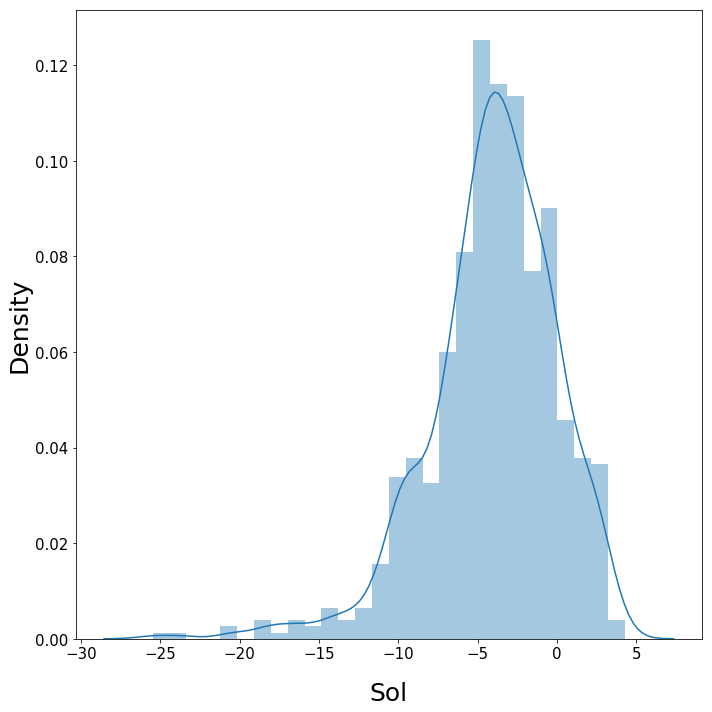

In [466]:
getFigs(combine_use, 'Sol', save=True, savepath='./solvation_summary/', savename='freesolMinnesota.svg')

## 5. Zang et al. Dataset

In [359]:
zang_ws = pd.read_excel('./ci6b00625_si_002.xlsx', sheet_name='LogS')
zang_vp = pd.read_excel('./ci6b00625_si_002.xlsx', sheet_name='LogVP')

In [360]:
zang_ws.shape, zang_vp.shape

((2010, 9), (2713, 9))

In [361]:
zang_ws_use, ele_ws = addInfo(zang_ws)
zang_vp_use, ele_vp = addInfo(zang_vp)

RDKit WARNING: [19:09:39] WARNING: Charges were rearranged
RDKit WARNING: [19:22:52] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:52] WARNING: Charges were rearranged
RDKit WARNING: [19:22:52] WARNING: Charges were rearranged
RDKit WARNING: [19:22:52] WARNING: Charges were rearranged
RDKit WARNING: [19:22:52] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:52] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:52] WARNING: Charges were rearranged
RDKit WARNING: [19:22:52] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:52] WARNING: Charges were rearranged
RDKit WARNING: [19:22:52] WARNING: Charges were rearranged
RDKit WARNING: [19:22:52] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:52] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:52] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:52] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:52] WARNING: Charges were rearranged
RDKit WARNING: [19:22:52] WARNING: Omitted undef

RDKit WARNING: [19:22:53] WARNING: Charges were rearranged
RDKit WARNING: [19:22:53] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:53] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [19:22:53] WARNING: Charges were rearranged
RDKit WARNING: [19:22:53] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:53] WARNING: Charges were rearranged
RDKit WARNING: [19:22:53] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:53] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:53] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [19:22:53] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:53] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:53] WARNING: Charges were rearranged
RDKit WARNING: [19:22:53] WARNING: Charges were rearranged
RDKit WARNING: [19:22:53] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:53] WARNING: Charges were rearranged
RDKit WARNING: [19:22:53] WARNING: Omitted undefined ste

RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Charges were rearranged
RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Charges were rearranged
RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Charges were rearranged
RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Charges were rearranged
RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:54] WARNING: Omitted u

RDKit WARNING: [19:22:58] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Charges were rearranged
RDKit WARNING: [19:22:58] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Proton(s) added/removed
RDKit WARNING: [19:22:58] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:58] WARNING: Charges were rearranged
RDKit WARNING: [19:22:58] WARNING: Charges were rearranged
RDKit WARNING: [19:

RDKit WARNING: [19:22:59] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:59] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:59] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:59] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Omitted undefine

In [362]:
zang_ws_use.shape, zang_vp_use.shape

((2010, 13), (2713, 13))

In [363]:
ele_ws, 
ele_vp

{'As', 'B', 'Br', 'C', 'Cl', 'F', 'I', 'N', 'Na', 'O', 'P', 'S', 'Se', 'Si'}

In [364]:
WsVp = pd.merge(zang_vp_use, zang_ws_use, on='InChI', how='inner')

In [365]:
WsVp.shape

(1134, 25)

In [366]:
WsVp_use = WsVp[['SMILES_x', 'InChI', 'LogS-Measured', 'Log VP-Measured']]

In [367]:
WsVp_use = WsVp_use.rename(columns={'SMILES_x': 'SMILES'})

In [368]:
wsvp_use1 = group(WsVp_use, 'InChI')

In [369]:
wsvp_use1.shape

(1134, 4)

In [370]:
wsvp_use2, ele_wsvp = addInfo(wsvp_use1)

RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:22:59] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:59] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:59] WARNING: Omitted undefined stereo
RDKit WARNING: [19:22:59] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted u

In [371]:
wsvp_use2.shape

(1134, 7)

In [372]:
ele_wsvp

{'Br', 'C', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S'}

In [373]:
wsvp_use2.head()

,LogS-Measured,Log VP-Measured,InChI,SMILES,Mol,RB,MW
0,-9.703,-7.9586,InChI=1S/C10Cl8/c11-3-1-2(5(13)9(17)7(3)15)6(1...,Clc1c2c(c(Cl)c(Cl)c1Cl)c(Cl)c(Cl)c(Cl)c2Cl,<rdkit.Chem.rdchem.Mol object at 0x1a281ae710>,0,399.750821
1,-1.686,-2.5114,InChI=1S/C10H10O4/c1-13-9(11)7-5-3-4-6-8(7)10(...,COC(=O)c1ccccc1C(=O)OC,<rdkit.Chem.rdchem.Mol object at 0x1a281ae9e0>,2,194.057909
2,-3.436,-6.0278,InChI=1S/C10H11F3N2O/c1-15(2)9(16)14-8-5-3-4-7...,CN(C)C(=O)Nc1cc(ccc1)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x1a281ae800>,1,232.082348
3,-3.574,-6.9469,InChI=1S/C10H11N3OS/c1-11-9(14)13(2)10-12-7-5-...,CNC(=O)N(C)c1[n]c2ccccc2[s]1,<rdkit.Chem.rdchem.Mol object at 0x1a281ae4e0>,1,221.062283
4,-3.452,-0.4342,InChI=1S/C10H12/c1-2-6-10-8-4-3-7-9(10)5-1/h1-...,C1CCCc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x1a281aead0>,0,132.093900


In [374]:
wsvp_use2['Sol'] = -1.985*298*(np.log(10**wsvp_use2['LogS-Measured']) - np.log(10**wsvp_use2['Log VP-Measured']*0.00131579/24.45))/1000 

In [375]:
wsvp_use3 = wsvp_use2[['SMILES', 'InChI', 'Sol', 'RB', 'MW']]

In [376]:
wsvp_use3.shape

(1134, 5)

In [377]:
getStats(wsvp_use3)

,Sol,RB,MW
mean,-4.832005,2.269841,171.076605
std,3.818645,2.592921,87.161305
min,-19.631053,0.000000,27.010899
max,5.544228,16.000000,502.973168


In [378]:
wsvp_use3.to_csv('./zang_processed_new.csv', index=False)

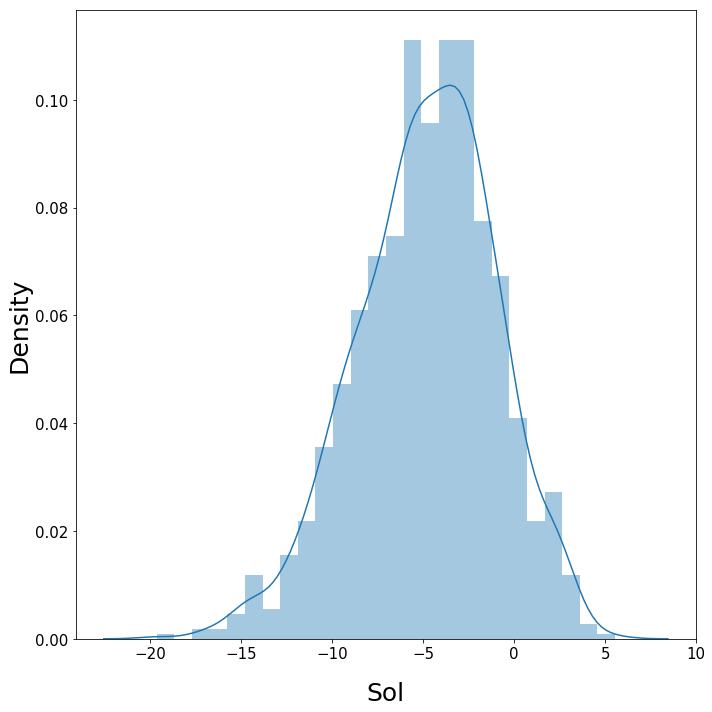

In [303]:
getFigs(wsvp_use3, 'Sol', save=True, savepath='./solvation_summary/', savename='zang.svg')

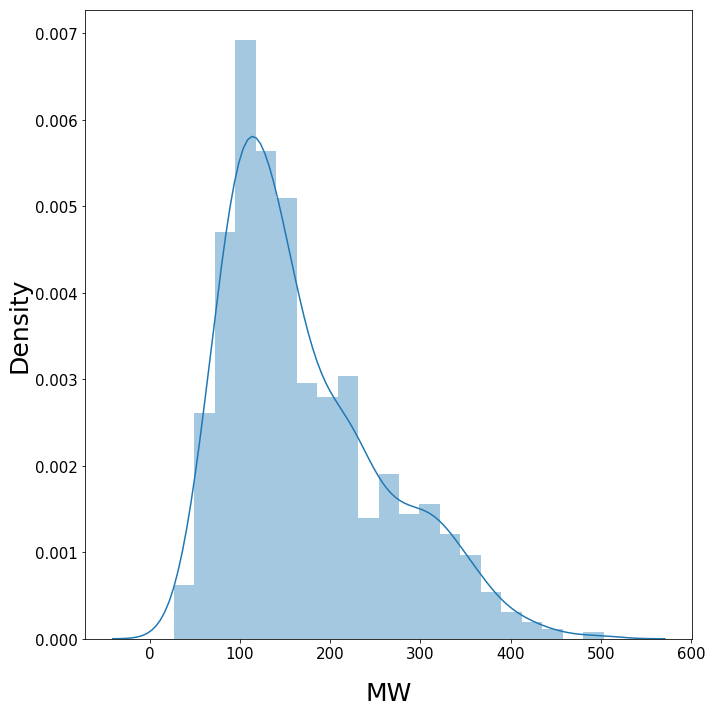

In [304]:
getFigs(wsvp_use3, 'MW', save=True, savepath='./solvation_summary/', savename='zang_mw.svg')

#### 5.1 Compare experimental data for common compounds in FreeSol-Minnesota and zang.

In [338]:
common_eq1 = pd.merge(combine_use, wsvp_use3, on='InChI', how='inner')

In [339]:
common_eq1.shape

(429, 7)

In [729]:
common_eq1['diff'] = abs(common_eq1['Sol_x'] - common_eq1['Sol_y'])

In [730]:
common_eq1['diff'].describe()

count    429.000000
mean       0.380828
std        0.631413
min        0.000090
25%        0.037054
50%        0.163905
75%        0.464144
max        6.910207
Name: diff, dtype: float64

In [747]:
common_eq1[common_eq1['diff'] > 1.]

,Sol_x,InChI,SMILES_x,SMILES_y,Sol_y,RB,MW,diff
0,-10.030,"InChI=1S/C10H12N3O3PS2/c1-15-17(18,16-2)19-7-1...",COP(=S)(OC)SCn1nnc2ccccc2c1=O,COP(=S)(OC)SCN1N=Nc2ccccc2C1=O,-8.014281,5,317.005770,2.015719
6,-5.910,"InChI=1S/C10H14O/c1-10(2,3)8-4-6-9(11)7-5-8/h4...",CC(C)(C)c1ccc(O)cc1,CC(C)(C)c1ccc(O)cc1,-4.461378,0,150.104465,1.448622
7,-6.680,"InChI=1S/C10H19N5S/c1-6-11-7-12-8(15-10(2,3)4)...",CCNc1nc(NC(C)(C)C)nc(SC)n1,CCNc1[n]c(NC(C)(C)C)[n]c([n]1)SC,-8.248826,4,241.136117,1.568826
11,-16.415,InChI=1S/C10H8ClN3O/c11-9-8(12)6-13-14(10(9)15...,c1nn(c2ccccc2)c(=O)c(Cl)c1N,NC1C=NN(C(=O)C=1Cl)c1ccccc1,-10.721896,1,221.035590,5.693104
19,-2.980,InChI=1S/C12Cl10/c13-3-1(4(14)8(18)11(21)7(3)1...,Clc1c(Cl)c(Cl)c(-c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c(...,Clc1c(-c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c(...,-0.565512,1,493.688527,2.414488
20,-4.530,InChI=1S/C12Cl8O2/c13-1-2(14)6(18)10-9(5(1)17)...,Clc1c(Cl)c(Cl)c2c(c1Cl)Oc1c(Cl)c(Cl)c(Cl)c(Cl)...,Clc1c2Oc3c(Oc2c(Cl)c(Cl)c1Cl)c(Cl)c(Cl)c(Cl)c3Cl,-5.846717,0,455.740651,1.316717
33,-3.710,InChI=1S/C12H2Cl6O2/c13-3-1-5-6(2-4(3)14)20-12...,Clc1cc2c(cc1Cl)Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1O2,Clc1cc2Oc3c(Oc2cc1Cl)c(Cl)c(Cl)c(Cl)c3Cl,-5.089827,0,387.818595,1.379827
34,-4.150,InChI=1S/C12H3Cl5O2/c13-4-1-2-5-6(3-4)19-12-10...,Clc1ccc2c(c1)Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1O2,Clc1cc2Oc3c(Oc2cc1)c(Cl)c(Cl)c(Cl)c3Cl,-5.416310,0,353.857568,1.266310
36,-3.370,InChI=1S/C12H4Cl4O2/c13-5-1-9-10(2-6(5)14)18-1...,Clc1cc2c(cc1Cl)Oc1cc(Cl)c(Cl)cc1O2,Clc1cc2Oc3cc(Cl)c(Cl)cc3Oc2cc1Cl,-5.292909,0,319.896540,1.922909
39,-3.480,InChI=1S/C12H6Cl4/c13-9-6-8(7-4-2-1-3-5-7)10(1...,Clc1cc(-c2ccccc2)c(Cl)c(Cl)c1Cl,Clc1cc(-c2ccccc2)c(Cl)c(Cl)c1Cl,-1.874304,1,289.922361,1.605696


[https://pubs.acs.org/doi/pdf/10.1021/jp805853y]


In [742]:
np.sqrt(mean_squared_error(common_eq1['Sol_x'], common_eq1['Sol_y']))

0.7367376051263842

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


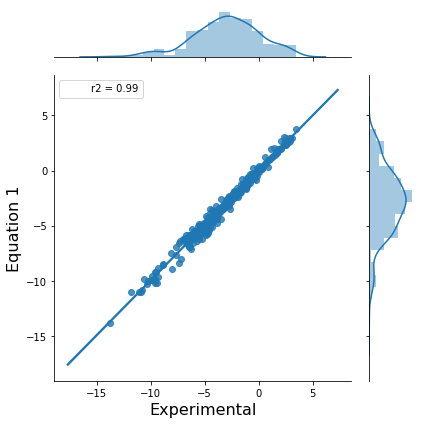

In [744]:
j = sns.jointplot(common_eq1[common_eq1['diff'] < 1.]['Sol_x'], common_eq1[common_eq1['diff'] < 1.]['Sol_y'], kind="reg", stat_func=r2)
j.set_axis_labels('Experimental', 'Equation 1', fontsize=16)
plt.tight_layout()
plt.show()
#j.savefig('./solvation_summary/common_eq1.svg', format='svg', dpi=1200)

## 6. PhysProp dataset

In [379]:
pp_hl = pd.read_csv('./HL_data.csv')

In [380]:
pp_hl.shape

(1711, 268)

In [381]:
pp_hl_use = pp_hl[pp_hl['HL Data Type'] == 'EXP'].reset_index(drop=True)

In [382]:
pp_hl_use.shape

(608, 268)

In [383]:
pp_hl_use1, ele_pp = addInfo(pp_hl_use)

RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Charges were rearranged
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:23:23] WARNING: Omitted undefined

In [384]:
pp_hl_use1.shape

(608, 272)

In [385]:
ele_pp

{'Br', 'C', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S', 'Se', 'Si'}

In [386]:
pp_hl_use2 = pp_hl_use1[['SMILES', 'HL']]

In [387]:
pp_hl_use3 = pp_hl_use2[filterdf(pp_hl_use2['SMILES'])]

In [388]:
pp_hl_use3.shape

(603, 2)

In [389]:
pp_hl_use4, ele_pp = addInfo(pp_hl_use3)

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
RDKit WARNING: [19:24:51] WARNING: Omitted undefined stereo
RDKit WARNING: [19:24:51] WARNING: Charges were rearranged
RDKit WARNING: [19:24:51] WARNING: Charges were rearranged
RDKit WARNING: [19:24:51] WARNING: Charges were rearranged
RDKit WARNING: [19:24:51] WARNING: Charges were rearranged
RDKit WARNING: [19:24:51] WARNING: Charges were rearranged
RDKit WARNING: [19:24:51] WARNING: Omitted undefined stereo
RDKit WARNING: [19:24:51] WARNING: Omitted undefined stereo
RDKit WARNING: [19:24:51] WARNING: Charges were rearranged
RDKit WARNING: [19:24:51] WARNING: Charges were rearranged
RDKit WARNING: [19:24:51] WARNING: Charges were rea

In [390]:
pp_hl_use4.shape

(603, 6)

In [391]:
ele_pp

{'Br', 'C', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S'}

In [392]:
getStats(pp_hl_use4)

,HL,RB,MW
mean,5.422039e-02,1.520730,168.727031
std,8.563466e-01,2.210099,97.734379
min,1.020000e-13,0.000000,27.010899
max,2.030000e+01,19.000000,539.626232


In [393]:
pp_hl_use4['Sol'] = 2.303*pp_hl_use4['HL'].apply(lambda x: 1.985*298*np.log10(x*1.218*10**4/298)/1000)

In [394]:
pp_hl_use4.to_csv('./hl_processed_new.csv', index=False)

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


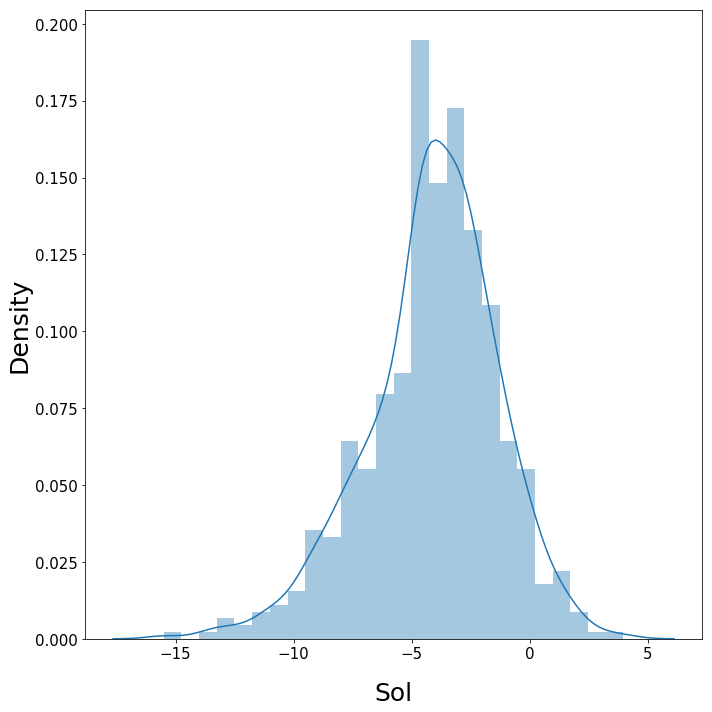

In [330]:
getFigs(pp_hl_use4, 'Sol', save=True, savepath='./solvation_summary/', savename='physprop.svg')

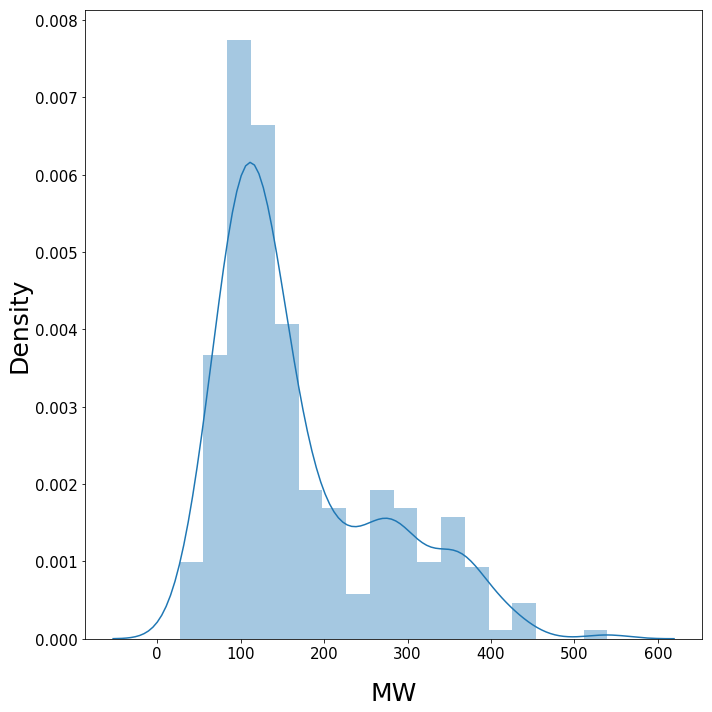

In [331]:
getFigs(pp_hl_use4, 'MW', save=True, savepath='./solvation_summary/', savename='physprop_mw.svg')

#### 6.1 Compare experimental data for common compounds in FreeSol-Minnesota and physprop

In [341]:
common_eq2 = pd.merge(combine_use, pp_hl_use4, on='InChI', how='inner')

In [342]:
common_eq2.shape

(307, 9)

In [736]:
common_eq2['diff'] = abs(common_eq2['Sol_x'] - common_eq2['Sol_y'])

In [738]:
common_eq2[common_eq2['diff'] > 1.]

,Sol_x,InChI,SMILES_x,SMILES_y,HL,Mol,RB,MW,Sol_y,diff
9,-2.15,InChI=1S/C11H22O/c1-3-4-5-6-7-8-9-10-11(2)12/h...,CCCCCCCCCC(C)=O,CCCCCCCCCC(C)=O,6.360000e-05,<rdkit.Chem.rdchem.Mol object at 0x12492bc60>,8,170.167065,-3.521681,1.371681
59,-9.30,"InChI=1S/C2H6O2/c3-1-2-4/h3-4H,1-2H2",OCCO,OCCO,6.000000e-08,<rdkit.Chem.rdchem.Mol object at 0x124907990>,1,62.036779,-7.643036,1.656964
86,-13.43,"InChI=1S/C3H8O3/c4-1-3(6)2-5/h3-6H,1-2H2",OCC(O)CO,OC(CO)CO,1.730000e-08,<rdkit.Chem.rdchem.Mol object at 0x1249136c0>,2,92.047344,-8.378818,5.051182
225,-3.45,InChI=1S/C7H7NO2/c1-6-3-2-4-7(5-6)8(9)10/h2-5H...,Cc1cccc([N+](=O)[O-])c1,Cc1cc(ccc1)[N+]([O-])=O,9.300000e-06,<rdkit.Chem.rdchem.Mol object at 0x1248f7440>,1,137.047678,-4.659161,1.209161
274,-1.46,"InChI=1S/C9H10/c1-2-5-9-7-3-6-8(9)4-1/h1-2,4-5...",c1ccc2c(c1)CCC2,C1CCc2ccccc21,2.010000e-04,<rdkit.Chem.rdchem.Mol object at 0x1a34d826c0>,0,118.078250,-2.840890,1.380890
296,-2.75,InChI=1S/CH2O/c1-2/h1H2,C=O,C=O,3.370000e-07,<rdkit.Chem.rdchem.Mol object at 0x1249138a0>,0,30.010565,-6.622026,3.872026


/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


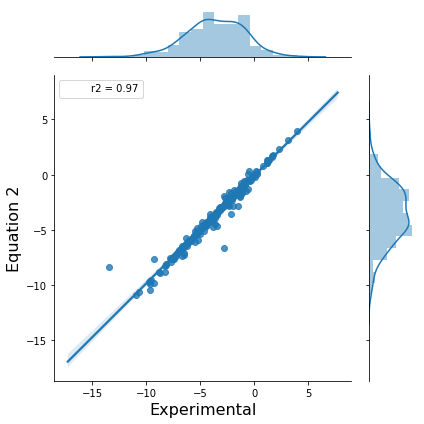

In [343]:
j = sns.jointplot(common_eq2['Sol_x'], common_eq2['Sol_y'], kind="reg", stat_func=r2)
j.set_axis_labels('Experimental', 'Equation 2', fontsize=16)
plt.tight_layout()
plt.show()
j.savefig('./solvation_summary/common_eq2.svg', format='svg', dpi=1200)

## 7. Combine FreeSol, Minnesota, Zang, and PhysProp

In [7]:
freesol_use = pd.read_csv('/Users/dongdongzhang/Desktop/group/database/freesol_processed_use.csv')

In [9]:
minne_use3 = pd.read_csv('/Users/dongdongzhang/Desktop/group/database/MNSol_processed_use.csv')

In [12]:
wsvp_use3 = pd.read_csv('/Users/dongdongzhang/Desktop/group/database/zang_processed_new.csv')

In [13]:
pp_hl_use4 = pd.read_csv('/Users/dongdongzhang/Desktop/group/database/hl_processed_new.csv')

In [17]:
freesol_use['source'] = 'FreeSol'

In [18]:
minne_use3['source'] = 'MinneSol'

In [19]:
wsvp_use3['source'] = 'zang'

In [20]:
pp_hl_use4['source'] = 'PhysProp'

In [23]:
wsvp_use3.columns

Index(['SMILES', 'InChI', 'LogS', 'LogVP', 'Sol', 'RB', 'MW', 'source'], dtype='object')

In [24]:
df_all = pd.concat([freesol_use[['source', 'Sol']], minne_use3[['source', 'Sol']], \
                   wsvp_use3[['source', 'Sol']], pp_hl_use4[['source', 'Sol']]])

In [25]:
count = df_all[['source', 'Sol']].groupby('source').count().sort_values(by=['Sol'], ascending=False)

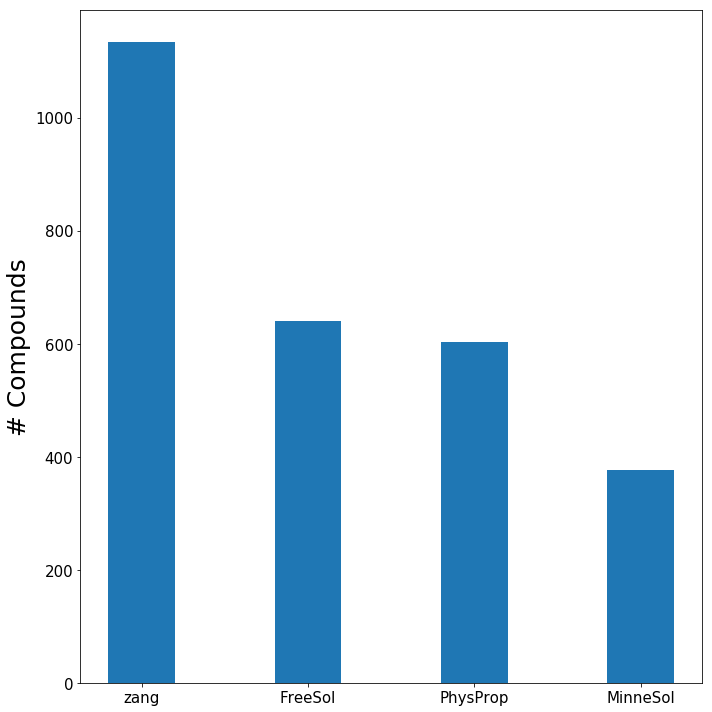

In [28]:
f1 = plt.figure(figsize=(10,10))
ax1 = f1.add_subplot(111)

ax1.axes.bar(count.index.tolist(), \
             count['Sol'].tolist(), width=0.4)

#ax1.set_xlabel('Elements', fontsize=25)
ax1.set_ylabel('# Compounds', fontsize=25)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
ax1.xaxis.labelpad = 20
plt.tight_layout()

f1.savefig('/Users/dongdongzhang/Desktop/group/database/solvation_summary/datasets.svg', format='svg', dpi=1200)

In [396]:
(freesol_use.shape, 
minne_use3.shape, 
wsvp_use3.shape,
pp_hl_use4.shape)

((640, 6), (377, 6), (1134, 5), (603, 7))

In [397]:
(freesol_use.columns, 
minne_use3.columns, 
wsvp_use3.columns,
pp_hl_use4.columns)

(Index(['SMILES', 'Sol', 'Mol', 'InChI', 'RB', 'MW'], dtype='object'),
 Index(['Sol', 'RB', 'MW', 'InChI', 'SMILES', 'Mol'], dtype='object'),
 Index(['SMILES', 'InChI', 'Sol', 'RB', 'MW'], dtype='object'),
 Index(['SMILES', 'HL', 'Mol', 'InChI', 'RB', 'MW', 'Sol'], dtype='object'))

In [398]:
freesol_use['source'] = 'FreeSol'
minne_use3['source'] = 'Minnesota'
wsvp_use3['source'] = 'Zang'
pp_hl_use4['source'] = 'PhysProp'

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [402]:
combine_all = pd.concat([freesol_use[['SMILES', 'InChI', 'Sol', 'source']], 
                        minne_use3[['SMILES', 'InChI', 'Sol', 'source']], 
                        wsvp_use3[['SMILES', 'InChI', 'Sol', 'source']],
                        pp_hl_use4[['SMILES', 'InChI', 'Sol', 'source']]]).reset_index(drop=True)

In [404]:
combine_all.shape

(2754, 4)

In [433]:
onlyinchis = combine_all[~combine_all.duplicated('InChI', False)]

In [434]:
onlyinchis.shape

(929, 4)

In [409]:
dupliInChis = combine_all[combine_all.duplicated('InChI', False)]['InChI'].tolist()

In [417]:
len(dupliInChis)

1825

In [411]:
from collections import defaultdict

In [447]:
inchi_values = defaultdict(list)
inchi_smiles = defaultdict(list)
inchi_sources = defaultdict(list)

for inchi in set(dupliInChis):
    inchi_values[inchi].append(combine_all[combine_all['InChI']==inchi]['Sol'].values)
    inchi_smiles[inchi].append(combine_all[combine_all['InChI']==inchi]['SMILES'].values)
    inchi_sources[inchi].append(combine_all[combine_all['InChI']==inchi]['source'].values)
    

In [448]:
len(inchi_values), len(inchi_smiles), len(inchi_sources)

(673, 673, 673)

In [607]:
keys = []
nums = []
stds = []
for key, value in inchi_values.items():
    keys.append(key)
    nums.append(len(value))
    stds.append(np.std(value))

In [628]:
np.array(keys)[np.argwhere(np.array(stds) < 0.1)].shape

(361, 1)

In [629]:
dupinchis_values = []
dupinchis_smiles = []
dupinchis_sources = []
for inchi in np.array(keys)[np.argwhere(np.array(stds) < 0.1)]:
    dupinchis_values.append(np.mean(inchi_values[inchi[0]])) # groupby mean 
    dupinchis_smiles.append(inchi_smiles[inchi[0]][0][0])
    dupinchis_sources.append(''.join(inchi_sources[inchi[0]][0]))

In [630]:
dfDuplis = pd.DataFrame(dupinchis_smiles, columns=['SMILES'])

In [631]:
dfDuplis['InChI'] = np.array(keys)[np.argwhere(np.array(stds) < 0.1)]

In [632]:
dfDuplis['Sol'] = dupinchis_values

In [633]:
dfDuplis['source'] = dupinchis_sources

In [634]:
dfDuplis.shape

(361, 4)

In [635]:
combine_all_use = pd.concat([onlyinchis, dfDuplis]).reset_index(drop=True)

In [678]:
combine_all_use.shape

(1290, 4)

In [685]:
combine_all_use1,_ = addInfo(combine_all_use)

RDKit WARNING: [14:54:07] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged
RDKit WARNING: [14:54:07] WARNING: Charges were rearranged
RDKit WARNING: [14:54:07] WARNING: Omitted undefined stereo
RDKit WARNING: [14:54:07] WARNING: Charges 

RDKit WARNING: [14:59:36] WARNING: Charges were rearranged
RDKit WARNING: [14:59:36] WARNING: Charges were rearranged
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:36] WARNING: Charges were rearranged
RDKit WARNING: [14:59:36] WARNING: Charges were rearranged
RDKit WARNING: [14:59:36] WARNING: Omitted u

In [686]:
getStats(combine_all_use1)

,Sol,RB,MW
mean,-5.093007,2.371318,178.027328
std,4.031526,2.564171,92.268915
min,-25.470000,0.000000,2.015650
max,3.958218,19.000000,539.626232


In [679]:
combine_all_use.to_csv('./solvation_processed_hq.csv', index=False)

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


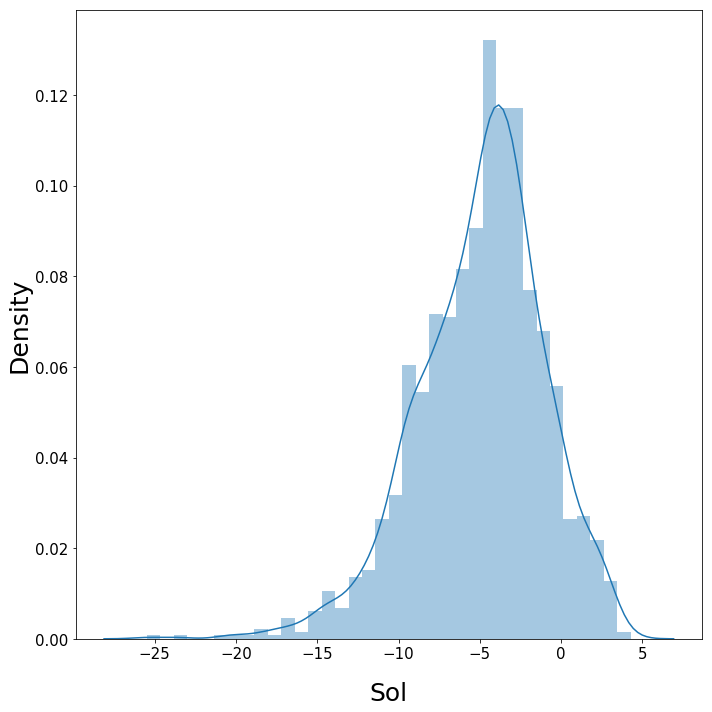

In [680]:
getFigs(all_combine_use, 'Sol', save=True, savepath='./solvation_summary/', savename='all.svg')

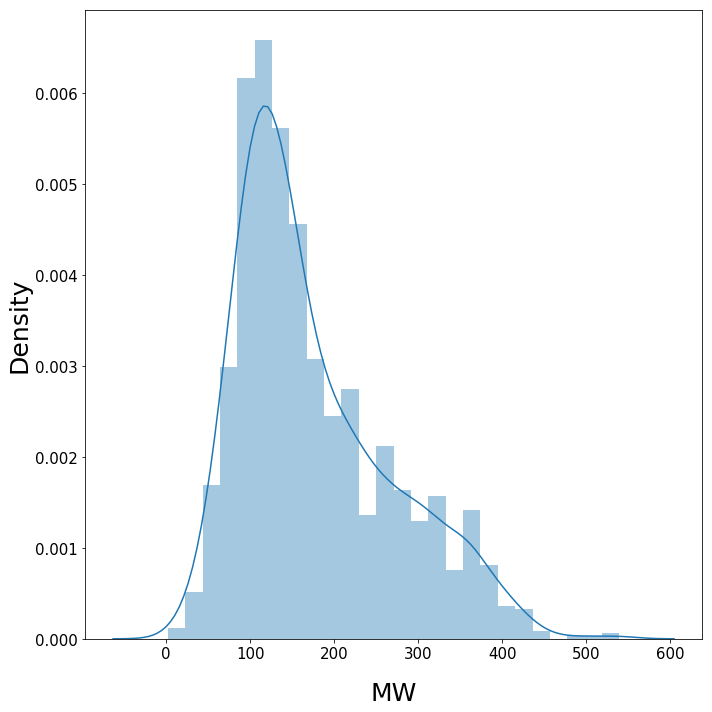

In [681]:
getFigs(all_combine_use, 'MW', save=True, savepath='./solvation_summary/', savename='all_mw.svg')

Let's write out the all combined compounds. 

In [403]:
all_combine_use.to_csv('./solvation_process_news.csv', index=False)

In [105]:
all_combine_use = pd.read_csv('./solvation_processed_new.csv')

In [412]:
all_common = combine_all1[(~pd.isnull(combine_all1['source_x'])) & (~pd.isnull(combine_all1['source_y'])) &
                          (~pd.isnull(combine_all1['source']))]

In [413]:
all_common.shape

(243, 16)

#### 7.1 Let's find compounds with all four different sources. 

In [420]:
all_common['std'] = all_common[['Sol', 'Sol_x', 'Sol_y']].std(axis=1)

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Write out std between four sources less than 0.1 and 1.0. 

In [429]:
all_common[all_common['std'] < 0.1].to_csv('test_0.1_qm.csv', index=False)

In [430]:
all_common[all_common['std'] < 1.0].to_csv('test_1.0_qm.csv', index=False)

#### There are several makeup compounds we need to consider. 

In [433]:
all_combine_use.shape

(1602, 7)

In [107]:
solvation_old = pd.read_csv('./solvation_processed.csv')

In [108]:
solvation_old.shape

(1492, 3)

In [457]:
inchis = []
smis = []
values = []
for inchi, smi, value in zip(all_combine_use['InChI'].tolist(), all_combine_use['SMILES'].tolist(), all_combine_use['Sol'].tolist()):
    if inchi not in solvation_old['InChI'].tolist():
        inchis.append(inchi)
        values.append(value)
        smis.append(smi)

In [458]:
dfMakeup = pd.DataFrame(smis, index=range(len(smis)), columns=['SMILES'])

In [459]:
dfMakeup['InChI'] = pd.DataFrame(inchis)

In [460]:
dfMakeup['Sol'] = pd.DataFrame(values)

In [462]:
dfMakeup.to_csv('./solvation_makeup.csv', index=False)

In [78]:
dfMakeup.shape

(112, 3)

In [171]:
makeups_gas = np.load('./makeups_gas_opt_log.npy')

In [172]:
dfMakeup_gas = pd.DataFrame([i for i in makeups_gas], columns=['enerGas', 'Time', 'ID'])

In [173]:
dfMakeup_gas.head()

,enerGas,Time,ID
0,-1982.16632420,1142.5,6.0
1,-2497.94732503,1035.5,38.0
2,-1269.48172656,3571.2,30.0
3,-1064.50839858,137.0,5.0
4,-1269.48312353,1209.2,30.0


In [174]:
dfMakeup_gas.shape

(7017, 3)

In [175]:
dfMakeup_gas_use = dfMakeup_gas[~pd.isnull(dfMakeup_gas['enerGas'])].reset_index(drop=True)

In [176]:
dfMakeup_gas_use.shape

(6370, 3)

In [232]:
dfMakeup_gas_use['enerGas'] = dfMakeup_gas_use['enerGas'].astype(float)

In [233]:
dfMakeup_gas_group = dfMakeup_gas_use.groupby('ID').min()

In [234]:
dfMakeup_gas_group.shape

(108, 2)

In [235]:
dfMakeup_gas_group.head()

,enerGas,Time
ID,,
1.0,-1915.968185,7.1
2.0,-1916.516335,1.7
3.0,-2275.113035,33.6
4.0,-1560.418668,43.1
5.0,-1064.509496,0.9


In [236]:
dfMakeup_gas_group['ID'] = dfMakeup_gas_group.index
dfMakeup_gas_group.index = range(dfMakeup_gas_group.shape[0])

In [195]:
makeups_water = np.load('./makeups_water_smd_log.npy')

In [182]:
dfMakeup_water = pd.DataFrame([i for i in makeups_water], columns=['enerWat', 'Time', 'ID'])

In [183]:
dfMakeup_water_use = dfMakeup_water[~pd.isnull(dfMakeup_water['enerWat'])].reset_index(drop=True)

In [217]:
dfMakeup_water_use[dfMakeup_water_use['ID'] == 3.0]['enerWat'].astype(float).min()

-2275.11971815

In [215]:
dfMakeup_water_use['enerWat'].min()

'-1025.20270614'

In [227]:
dfMakeup_water_use['enerWat'] = dfMakeup_water_use['enerWat'].astype(float)

In [228]:
dfMakeup_water_group = dfMakeup_water_use.groupby('ID').min()

In [229]:
dfMakeup_water_group.shape

(111, 2)

In [230]:
dfMakeup_water_group['ID'] = dfMakeup_water_group.index
dfMakeup_water_group.index = range(dfMakeup_water_group.shape[0])

In [237]:
Makeup_gasWat = dfMakeup_gas_group.merge(dfMakeup_water_group, on='ID', how='inner')

In [238]:
Makeup_gasWat['CalcSol'] = 627.509*(Makeup_gasWat['enerWat'].astype(float) - Makeup_gasWat['enerGas'].astype(float))

In [239]:
Makeup_inchi = []
Makeup_smi = []
for id_ in Makeup_gasWat['ID']:
    Makeup_inchi.append(dfMakeup['InChI'].tolist()[int(id_)])
    Makeup_smi.append(dfMakeup['SMILES'].tolist()[int(id_)])

In [240]:
Makeup_gasWat['SMILES'] = Makeup_smi

In [241]:
Makeup_gasWat['InChI'] = Makeup_inchi

In [483]:
Makeup_gasWat_use = Makeup_gasWat[['InChI', 'CalcSol', 'Time_x', 'Time_y']]

## 8. Comparison between experimental and theoretical data.

In [86]:
gas = np.load('./gas_opt_log.npy')
water = np.load('./wat_smd_log.npy')
octa = np.load('./oct_smd_log.npy')

In [88]:
df_gas = pd.DataFrame([i for i in gas], columns=['enerGas', 'Time', 'ID'])

In [218]:
df_gas.head()

,enerGas,Time,ID
0,-1906.20022407,2020.3,1455.0
1,-468.340055842,1474.9,688.0
2,-1637.06964145,1759.9,1452.0
3,-1940.83600986,2763.1,1454.0
4,-386.334336746,652.2,109.0


In [89]:
df_gas.shape

(66105, 3)

In [90]:
df_wat = pd.DataFrame([i for i in water], columns=['enerWat', 'Time', 'ID'])

In [489]:
df_wat.head()

,enerWat,Time,ID
0,-1094.75059531,718.4,1257.0
1,-1014.91980207,479.7,1334.0
2,-897.425525720,232.3,1078.0
3,-1585.41507392,868.2,1329.0
4,-779.470572887,456.9,913.0


In [91]:
df_wat.shape

(65085, 3)

In [92]:
df_gas_use = df_gas[~pd.isnull(df_gas['enerGas'])].reset_index(drop=True)

In [256]:
df_gas_use['enerGas'] = df_gas_use['enerGas'].astype(float)

In [766]:
df_gas_use.shape

(65085, 3)

In [93]:
df_wat_use = df_wat[~pd.isnull(df_wat['enerWat'])].reset_index(drop=True)

In [768]:
df_wat_use.shape

(65078, 3)

In [258]:
df_gas_group = df_gas_use.groupby('ID').min()

In [259]:
df_gas_group.shape

(1428, 2)

In [260]:
df_gas_group['ID'] = df_gas_group.index

In [261]:
df_gas_group.index = range(df_gas_group.shape[0])

In [262]:
df_gas_group.head()

,enerGas,Time,ID
0,-613.979557,1425.7,0.0
1,-594.084153,1519.9,1.0
2,-1559.887943,2.0,2.0
3,-464.719491,1454.5,3.0
4,-468.352788,1293.3,4.0


In [257]:
df_wat_use['enerWat'] = df_wat_use['enerWat'].astype(float)

In [263]:
df_wat_group = df_wat_use.groupby('ID').min()

In [264]:
df_wat_group.shape

(1428, 2)

In [265]:
df_wat_group['ID'] = df_wat_group.index

In [266]:
df_wat_group.index = range(df_wat_group.shape[0])

In [267]:
df_wat_group.head()

,enerWat,Time,ID
0,-613.991744,190.0,0.0
1,-594.094491,196.9,1.0
2,-1559.895386,370.4,2.0
3,-464.726014,186.8,3.0
4,-468.355735,188.2,4.0


In [268]:
gasWat = df_gas_group.merge(df_wat_group, on='ID', how='inner')

In [270]:
gasWat.head()

,enerGas,Time_x,ID,enerWat,Time_y
0,-613.979557,1425.7,0.0,-613.991744,190.0
1,-594.084153,1519.9,1.0,-594.094491,196.9
2,-1559.887943,2.0,2.0,-1559.895386,370.4
3,-464.719491,1454.5,3.0,-464.726014,186.8
4,-468.352788,1293.3,4.0,-468.355735,188.2


In [271]:
gasWat['CalcSol'] = 627.509*(gasWat['enerWat'].astype(float) - gasWat['enerGas'].astype(float))

In [272]:
gasWat.shape

(1428, 6)

In [520]:
solvation_old.head()

,SMILES,InChI,SolEnergy
0,CCCOC(=O)c1ccc(O)cc1,InChI=1S/C10H12O3/c1-2-7-13-10(12)8-3-5-9(11)6...,-9.370000
1,CCOc1ccc(N=C(C)O)cc1,InChI=1S/C10H13NO2/c1-3-13-10-6-4-9(5-7-10)11-...,-10.944049
2,CCOP(=S)(OCC)Oc1ccc([N+](=O)[O-])cc1,"InChI=1S/C10H14NO5PS/c1-3-14-17(18,15-4-2)16-1...",-6.717396
3,CC(C)(C)c1ccc(O)cc1,"InChI=1S/C10H14O/c1-10(2,3)8-4-6-9(11)7-5-8/h4...",-5.892801
4,CCCCCCCCC(C)=O,InChI=1S/C10H20O/c1-3-4-5-6-7-8-9-10(2)11/h3-9...,-2.212438


In [106]:
all_combine_use.head()

,Sol,InChI,SMILES,source,Mol,RB,MW
0,-11.270,InChI=1S/2H2O/h2*1H2,O.O,FreeSolMinnesota,<rdkit.Chem.rdchem.Mol object at 0x1a356f0ad0>,0,36.021129
1,-7.630,InChI=1S/C10H10N2/c1-2-4-10(5-3-1)8-12-7-6-11-...,c1ccc(Cn2ccnc2)cc1,FreeSolMinnesota,<rdkit.Chem.rdchem.Mol object at 0x1a35337f30>,2,158.084398
2,-6.215,InChI=1S/C10H12N2O5/c1-3-6(2)8-4-7(11(14)15)5-...,c1([C@H](C)CC)c(O)c(cc(c1)N(=O)=O)N(=O)=O,FreeSolMinnesota,<rdkit.Chem.rdchem.Mol object at 0x1a35c4bda0>,4,240.074621
3,-10.030,"InChI=1S/C10H12N3O3PS2/c1-15-17(18,16-2)19-7-1...",COP(=S)(OC)SCn1nnc2ccccc2c1=O,FreeSolMinnesota,<rdkit.Chem.rdchem.Mol object at 0x1a35c4b0d0>,5,317.005770
4,-9.370,InChI=1S/C10H12O3/c1-2-7-13-10(12)8-3-5-9(11)6...,c1cc(ccc1C(=O)OCCC)O,FreeSolMinnesota,<rdkit.Chem.rdchem.Mol object at 0x1a35c4b350>,3,180.078644


In [109]:
expSol = []
sources = []
inchis = []
for inchi in solvation_old['InChI'].tolist():
    if inchi in all_combine_use['InChI'].tolist():
        expSol.append(all_combine_use[all_combine_use['InChI'] == inchi].values[0][0])
        sources.append(all_combine_use[all_combine_use['InChI'] == inchi].values[0][3])
        inchis.append(inchi)
    else:
        expSol.append(None)
        sources.append(None)
        inchis.append(None)

In [273]:
expSolDF = []
sourcesDF = []
inchisDF = []
for i in gasWat['ID'].tolist():
    expSolDF.append(expSol[int(i)])
    sourcesDF.append(sources[int(i)])
    inchisDF.append(inchis[int(i)])

In [274]:
len(expSolDF), len(sourcesDF), len(inchisDF)

(1428, 1428, 1428)

In [275]:
gasWat['expSol'] = expSolDF
gasWat['sources'] = sourcesDF
gasWat['InChI'] = inchisDF

In [500]:
gasWat_use = gasWat[~pd.isnull(gasWat['InChI'])].reset_index(drop=True)

In [503]:
gasWat_use1 = gasWat_use[['InChI', 'CalcSol', 'Time_x', 'Time_y']]

In [505]:
solvation_calc = pd.concat([gasWat_use1, Makeup_gasWat_use]).reset_index(drop=True)

In [506]:
solvation_calc.shape

(1534, 4)

In [508]:
len(solvation_calc['InChI'])

1534

In [509]:
solvation_calc.to_csv('./solvation_calc.csv', index=False)

#### 8.1 Compare SMD with minnesota

In [277]:
minne_use1.shape

(380, 8)

In [278]:
MinneSMD = minne_use1.merge(gasWat, on='InChI', how='left')

In [279]:
MinneSMD.shape

(380, 16)

In [280]:
MinneSMD_use = MinneSMD[['FileHandle', 'SMILES', 'Sol', 'InChI', 'CalcSol', 'expSol']]

In [116]:
MinneSMD_use.head()

,FileHandle,SMILES,Sol,InChI,CalcSol,expSol
0,0008noc,C(CCCC)CCC,2.89,"InChI=1S/C8H18/c1-3-5-7-8-6-4-2/h3-8H2,1-2H3",2.910730,2.885
1,0036tol,c1cc(ccc1)C,-0.89,"InChI=1S/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3",-0.259111,-0.895
2,0045eth,OCC,-5.01,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",-4.395725,-5.005
3,0062dio,C1COCCO1,-5.05,InChI=1S/C4H8O2/c1-2-6-4-3-5-1/h1-4H2,-4.776925,-5.055
4,0076but,CCC(=O)C,-3.64,"InChI=1S/C4H8O/c1-3-4(2)5/h3H2,1-2H3",-3.157365,-3.640


In [281]:
MinneSMD_use1 = MinneSMD_use[~pd.isnull(MinneSMD_use['CalcSol'])]

In [282]:
MinneSMD_use1.shape

(284, 6)

In [139]:
MinneSMD_use1.columns

Index(['FileHandle', 'SMILES', 'Sol', 'InChI', 'CalcSol', 'expSol'], dtype='object')

In [243]:
MinneSMD_use2 = minne_use1.merge(Makeup_gasWat, on='InChI', how='left')

In [244]:
MinneSMD_use1_1 = MinneSMD_use2[~pd.isnull(MinneSMD_use2['CalcSol'])]

In [247]:
MinneSMD_use1_1 = MinneSMD_use1_1.rename(columns={'SMILES_x': 'SMILES'})

In [284]:
MinneSMD_use_all = pd.concat([MinneSMD_use1[['FileHandle', 'SMILES', 'InChI', 'Sol', 'CalcSol']], \
                             MinneSMD_use1_1[['FileHandle', 'SMILES', 'InChI', 'Sol', 'CalcSol']]])

In [285]:
MinneSMD_use_all = MinneSMD_use_all.reset_index(drop=True)

In [299]:
MinneSMD_use_all = MinneSMD_use_all.rename(columns={'FileHandle': 'Code'})

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


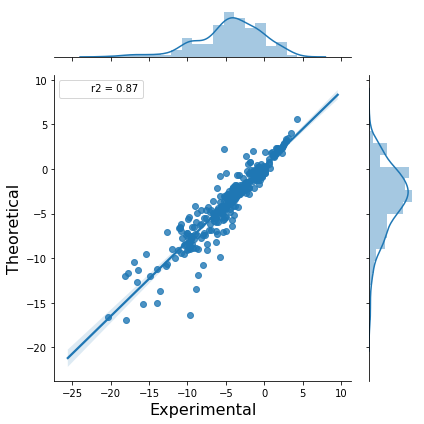

In [286]:
j = sns.jointplot(MinneSMD_use_all['Sol'], MinneSMD_use_all['CalcSol'], kind="reg", stat_func=r2)
j.set_axis_labels('Experimental', 'Theoretical', fontsize=16)
plt.tight_layout()
plt.show()
#j.savefig('./solvation_summary/expCalc_Minnesota.svg', format='svg', dpi=1200)

In [287]:
np.sqrt(mean_squared_error(MinneSMD_use_all['Sol'], MinneSMD_use_all['CalcSol']))

1.8159528119098656

In [288]:
mean_absolute_error(MinneSMD_use_all['Sol'], MinneSMD_use_all['CalcSol'])

1.294563839958083

In [289]:
MinneSMD_use1.shape

(284, 6)

In [314]:
MinneSMD_ref = pd.read_excel('../solvation/minnesotaCompare.xlsx')

In [315]:
MinneSMD_ref.head()

,Code,Name,exper.,ESE-ACP ESE-CM5 ESE-IACP,Unnamed: 4,Unnamed: 5,ESE-ESP,SMD,PCM
0,0001met,methane,2.0,0.6,0.8,0.0,0.5,2.2,-0.1
1,0002eth,ethane,1.8,0.8,0.9,0.4,1.2,1.8,-0.1
2,0003pro,n-propane,2.0,1.0,1.1,0.6,1.3,1.8,-0.1
3,0004nbu,n-butane,2.1,1.2,1.2,0.8,1.5,2.0,-0.2
4,0005npe,n-pentane,2.3,1.4,1.3,1.0,1.8,2.2,-0.2


In [1]:
trular274 = pd.read_csv('../solvation/Trular274.csv', names=['SoluteName', 'solvent', 'Sol'])

NameError: name 'pd' is not defined

In [873]:
trular274.head()

,SoluteName,solvent,Sol
0,"1,1,1,2-tetrachloroethane",water,-1.15
1,"1,1,1,3,3,3-hexafluoropropan-2-ol",water,-3.77
2,"1,1,1-trichloroethane",water,-0.25
3,"1,1,1-trifluoropropan-2-ol",water,-4.16
4,"1,1,2-trichloro-1,2,2-trifluoroethane",water,1.77


In [291]:
trular274_use = trular274.merge(minne_use1, on='SoluteName', how='left')

In [293]:
trular274_use1 = trular274_use[~pd.isnull(trular274_use['FileHandle'])]

In [294]:
trular274_use1.shape

(218, 10)

In [295]:
trular274_use1 = trular274_use1.rename(columns={'FileHandle': 'Code'})

In [300]:
trular274_use2 = trular274_use1.merge(MinneSMD_use_all, on='Code', how='left')

In [301]:
trular274_use2.shape

(218, 14)

In [302]:
trular274_use3 =trular274_use2[~pd.isnull(trular274_use2['CalcSol'])]

In [303]:
trular274_use3.shape

(200, 14)

In [310]:
trular274_use4 =trular274_use3[~pd.isnull(trular274_use3['Sol'])]

In [311]:
trular274_use4.shape

(200, 14)

In [305]:
trular274_use3.head()

,SoluteName,solvent,Sol_x,Code,SMILES_x,Sol_y,Mol,InChI_x,RB,MW,SMILES_y,InChI_y,Sol,CalcSol
1,"1,1,1,3,3,3-hexafluoropropan-2-ol",water,-3.77,0212hex,OC(C(F)(F)F)C(F)(F)F,-3.77,<rdkit.Chem.rdchem.Mol object at 0x1a1f2eebc0>,"InChI=1S/C3H2F6O/c4-2(5,6)1(10)3(7,8)9/h1,10H",0.0,168.000984,OC(C(F)(F)F)C(F)(F)F,"InChI=1S/C3H2F6O/c4-2(5,6)1(10)3(7,8)9/h1,10H",-3.77,-1.827961
3,"1,1,1-trifluoropropan-2-ol",water,-4.16,0211tri,O[C@H](C)C(F)(F)F,-4.16,<rdkit.Chem.rdchem.Mol object at 0x1a1f2eeb70>,"InChI=1S/C3H5F3O/c1-2(7)3(4,5)6/h2,7H,1H3/t2-/...",0.0,114.029249,O[C@H](C)C(F)(F)F,"InChI=1S/C3H5F3O/c1-2(7)3(4,5)6/h2,7H,1H3/t2-/...",-4.16,-2.918394
7,"1,1-dimethyl-3-phenylurea",water,-9.63,0401amia,c1ccc(cc1)NC(=O)N(C)C,-9.63,<rdkit.Chem.rdchem.Mol object at 0x1a1f2eb940>,InChI=1S/C9H12N2O/c1-11(2)9(12)10-8-6-4-3-5-7-...,1.0,164.094963,c1ccc(cc1)NC(=O)N(C)C,InChI=1S/C9H12N2O/c1-11(2)9(12)10-8-6-4-3-5-7-...,-9.63,-8.118598
8,"1,1-dimethylhydrazine",water,-4.48,n006,N(N)(C)C,-4.48,<rdkit.Chem.rdchem.Mol object at 0x1a1f2f0580>,"InChI=1S/C2H8N2/c1-4(2)3/h3H2,1-2H3",0.0,60.068748,N(N)(C)C,"InChI=1S/C2H8N2/c1-4(2)3/h3H2,1-2H3",-4.48,-4.485825
9,"1,2-dichlorobenzene",water,-1.36,0175odi,c1(c(cccc1)Cl)Cl,-1.36,<rdkit.Chem.rdchem.Mol object at 0x1a1f2ecee0>,InChI=1S/C6H4Cl2/c7-5-3-1-2-4-6(5)8/h1-4H,0.0,145.969005,c1(c(cccc1)Cl)Cl,InChI=1S/C6H4Cl2/c7-5-3-1-2-4-6(5)8/h1-4H,-1.36,-1.054152


In [334]:
np.sqrt(mean_squared_error(trular274_use3['Sol_x'], trular274_use3['CalcSol']))

1.1256920158338692

In [313]:
mean_absolute_error(trular274_use3['Sol_x'], trular274_use3['CalcSol'])

0.8498582764008004

In [335]:
r2(trular274_use3['Sol_x'], trular274_use3['CalcSol'])

0.9334936733455789

In [800]:
MinneSMD_use = MinneSMD_use.rename(columns={'FileHandle': 'Code'})

In [831]:
MinneSMD_ref.head()

,Code,Name,exper.,ESE-ACP ESE-CM5 ESE-IACP,Unnamed: 4,Unnamed: 5,ESE-ESP,SMD,PCM
0,0001met,methane,2.0,0.6,0.8,0.0,0.5,2.2,-0.1
1,0002eth,ethane,1.8,0.8,0.9,0.4,1.2,1.8,-0.1
2,0003pro,n-propane,2.0,1.0,1.1,0.6,1.3,1.8,-0.1
3,0004nbu,n-butane,2.1,1.2,1.2,0.8,1.5,2.0,-0.2
4,0005npe,n-pentane,2.3,1.4,1.3,1.0,1.8,2.2,-0.2


In [316]:
SMDCompare = MinneSMD_ref.merge(MinneSMD_use_all, on='Code', how='left')

In [317]:
SMDCompare.shape

(390, 13)

In [318]:
SMDCompare_use = SMDCompare[~pd.isnull(SMDCompare['CalcSol'])]

In [320]:
SMDCompare_use1 = SMDCompare_use[['Code','exper.', 'SMILES', 'InChI', 'Sol', 'SMD', 'CalcSol']]

In [321]:
SMDCompare_use1.head()

,Code,exper.,SMILES,InChI,Sol,SMD,CalcSol
0,0001met,2.0,C,InChI=1S/CH4/h1H4,2.00,2.2,2.273013
2,0003pro,2.0,CCC,"InChI=1S/C3H8/c1-3-2/h3H2,1-2H3",1.96,1.8,2.020534
3,0004nbu,2.1,C(CC)C,"InChI=1S/C4H10/c1-3-4-2/h3-4H2,1-2H3",2.08,2.0,2.237818
4,0005npe,2.3,CCCCC,"InChI=1S/C5H12/c1-3-5-4-2/h3-5H2,1-2H3",2.33,2.2,2.447820
5,0006nhe,2.5,C(CCC)CC,"InChI=1S/C6H14/c1-3-5-6-4-2/h3-6H2,1-2H3",2.49,2.4,2.667315


In [324]:
SMDCompare_use1.shape

(350, 7)

In [331]:
np.sqrt(mean_squared_error(SMDCompare_use1['exper.'], SMDCompare_use1['SMD']))

1.5955026077786811

In [326]:
mean_absolute_error(SMDCompare_use1['exper.'], SMDCompare_use1['SMD'])

1.1260000000000001

In [327]:
r2(SMDCompare_use1['exper.'], SMDCompare_use1['SMD'])

0.8845055535038231

In [332]:
np.sqrt(mean_squared_error(SMDCompare_use1['exper.'], SMDCompare_use1['CalcSol']))

1.8110811348495264

In [329]:
mean_absolute_error(SMDCompare_use1['exper.'], SMDCompare_use1['CalcSol'])

1.2901305527003066

In [328]:
r2(SMDCompare_use1['exper.'], SMDCompare_use1['CalcSol'])

0.8727129114250651

In [ ]:
j = sns.jointplot(gasWat['expSol'], gasWat['CalcSol'], kind="reg", stat_func=r2)
j.set_axis_labels('Experimental', 'Theoretical', fontsize=16)
plt.tight_layout()
plt.show()
j.savefig('./solvation_summary/expCalc_all.svg', format='svg', dpi=1200)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [604]:
mean_absolute_error(gasWat[gasWat['sources'] == 'FreeSolMinnesota']['expSol'], gasWat[gasWat['sources'] == 'FreeSolMinnesota']['CalcSol'])

1.2408271856241084

In [605]:
gasWat[gasWat['sources'] == 'FreeSolMinnesota']['expSol'].shape

(573,)

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


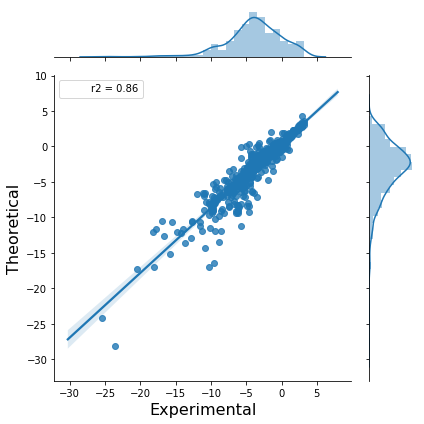

In [600]:
j = sns.jointplot(gasWat[gasWat['sources'] == 'FreeSolMinnesota']['expSol'], gasWat[gasWat['sources'] == 'FreeSolMinnesota']['CalcSol'], kind="reg", stat_func=r2)
j.set_axis_labels('Experimental', 'Theoretical', fontsize=16)
plt.tight_layout()
plt.show()
j.savefig('./solvation_summary/expCalc_freesolMinnesota.svg', format='svg', dpi=1200)

In [689]:
gasWat[gasWat['sources'] == 'FreeSolMinnesota'].head()

,enerGas,Time_x,ID,enerWat,Time_y,CalcSol,expSol,sources
0,-613.979275674,1425.7,0.0,-613.991033759,190.0,-7.378304,-9.37,FreeSolMinnesota
1,-594.074808401,1519.9,1.0,-594.089046865,196.9,-8.934764,-10.91,FreeSolMinnesota
2,-1559.87729575,2.0,2.0,-1559.89028248,370.4,-8.149290,-6.74,FreeSolMinnesota
3,-464.719357585,1454.5,3.0,-464.725948398,186.8,-4.135794,-5.91,FreeSolMinnesota
4,-468.342797331,1293.3,4.0,-468.345975799,188.2,-1.994517,-2.34,FreeSolMinnesota


In [548]:
solvation_calc.head()

,InChI,CalcSol,Time_x,Time_y
0,InChI=1S/C10H12O3/c1-2-7-13-10(12)8-3-5-9(11)6...,-7.647633,1425.7,190.0
1,InChI=1S/C10H13NO2/c1-3-13-10-6-4-9(5-7-10)11-...,-6.487129,1519.9,196.9
2,"InChI=1S/C10H14NO5PS/c1-3-14-17(18,15-4-2)16-1...",-4.670368,2.0,370.4
3,"InChI=1S/C10H14O/c1-10(2,3)8-4-6-9(11)7-5-8/h4...",-4.093571,1454.5,186.8
4,InChI=1S/C10H20O/c1-3-4-5-6-7-8-9-10(2)11/h3-9...,-1.849460,1293.3,188.2


In [637]:
compare = combine_all_use.merge(solvation_calc, on='InChI', how='left')

In [638]:
compare.shape

(1290, 7)

In [674]:
compare_use = compare[~pd.isnull(compare['CalcSol'])].reset_index(drop=True)

In [657]:
combine_all_use[~combine_all_use['source'].isin(['FreeSol', 'Minnesota', 'Zang', 'PhysProp'])].shape

(361, 4)

In [642]:
compare_use.shape

(1234, 7)

#### Get a high quality test set: data come from four different sources. 

In [662]:
test_hq = compare_use[compare_use['source'] == 'FreeSolMinnesotaZangPhysProp'].reset_index(drop=True)

In [645]:
test_hq.shape

(67, 7)

In [646]:
np.sqrt(mean_squared_error(test_hq['Sol'], test_hq['CalcSol']))

0.9155271735342755

In [647]:
mean_absolute_error(test_hq['Sol'], test_hq['CalcSol'])

0.7944975123548423

In [648]:
r2(test_hq['Sol'], test_hq['CalcSol'])

0.9301664857747473

In [663]:
test_hq['diff'] = abs(test_hq['Sol'] - test_hq['CalcSol'])

In [967]:
test_hq[test_hq['diff'] > 1.0]

,SMILES,InChI,Sol,source,CalcSol,Time_x,Time_y,diff
4,C1CCOCC1,InChI=1S/C5H10O/c1-2-4-6-5-3-1/h1-5H2,-3.152120,FreeSolMinnesotaZangPhysProp,-1.757258,389.9,77.4,1.394862
14,CN(C)C,InChI=1S/C3H9N/c1-4(2)3/h1-3H3,-3.178301,FreeSolMinnesotaZangPhysProp,-2.066896,176.7,51.2,1.111405
17,CCSCC,"InChI=1S/C4H10S/c1-3-5-4-2/h3-4H2,1-2H3",-1.469230,FreeSolMinnesotaZangPhysProp,-0.239993,258.6,64.1,1.229236
23,CCCCCC(=O)O,"InChI=1S/C6H12O2/c1-2-3-4-5-6(7)8/h2-5H2,1H3,(...",-6.199677,FreeSolMinnesotaZangPhysProp,-4.629069,608.1,102.4,1.570608
32,Cc1ccccc1N,"InChI=1S/C7H9N/c1-6-4-2-3-5-7(6)8/h2-5H,8H2,1H3",-5.543156,FreeSolMinnesotaZangPhysProp,-4.438477,601.8,104.2,1.104678
34,CCCNCCC,"InChI=1S/C6H15N/c1-3-5-7-6-4-2/h7H,3-6H2,1-2H3",-3.669968,FreeSolMinnesotaZangPhysProp,-1.772715,617.9,99.6,1.897253
35,Cc1ccccc1O,"InChI=1S/C7H8O/c1-6-4-2-3-5-7(6)8/h2-5,8H,1H3",-5.830913,FreeSolMinnesotaZangPhysProp,-4.825769,554.8,98.4,1.005144
36,ClC=C(Cl)Cl,InChI=1S/C2HCl3/c3-1-2(4)5/h1H,-0.462372,FreeSolMinnesotaZangPhysProp,0.592074,87.9,36.4,1.054446
37,CCNCC,"InChI=1S/C4H11N/c1-3-5-4-2/h5H,3-4H2,1-2H3",-4.082212,FreeSolMinnesotaZangPhysProp,-2.132723,284.3,65.6,1.949489
45,COCOC,"InChI=1S/C3H8O2/c1-4-3-5-2/h3H2,1-2H3",-2.938294,FreeSolMinnesotaZangPhysProp,-1.812675,201.6,54.8,1.125619


In [691]:
test_hq[test_hq['diff'] > 1.5]['InChI'].values

array(['InChI=1S/C6H12O2/c1-2-3-4-5-6(7)8/h2-5H2,1H3,(H,7,8)',
       'InChI=1S/C6H15N/c1-3-5-7-6-4-2/h7H,3-6H2,1-2H3',
       'InChI=1S/C4H11N/c1-3-5-4-2/h5H,3-4H2,1-2H3',
       'InChI=1S/C6H5NO2/c8-7(9)6-4-2-1-3-5-6/h1-5H',
       'InChI=1S/C5H11N/c1-2-4-6-5-3-1/h6H,1-5H2',
       'InChI=1S/C5H12O/c1-5(2,3)6-4/h1-4H3'], dtype=object)

In [693]:
combine_all[combine_all['InChI'] == 'InChI=1S/C6H12O2/c1-2-3-4-5-6(7)8/h2-5H2,1H3,(H,7,8)']

,SMILES,InChI,Sol,source
168,CCCCCC(=O)O,"InChI=1S/C6H12O2/c1-2-3-4-5-6(7)8/h2-5H2,1H3,(...",-6.210000,FreeSol
862,C(CC(=O)O)CCC,"InChI=1S/C6H12O2/c1-2-3-4-5-6(7)8/h2-5H2,1H3,(...",-6.210000,Minnesota
1691,CCCCCC(O)=O,"InChI=1S/C6H12O2/c1-2-3-4-5-6(7)8/h2-5H2,1H3,(...",-6.236263,Zang
2480,CCCCCC(O)=O,"InChI=1S/C6H12O2/c1-2-3-4-5-6(7)8/h2-5H2,1H3,(...",-6.142445,PhysProp


/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


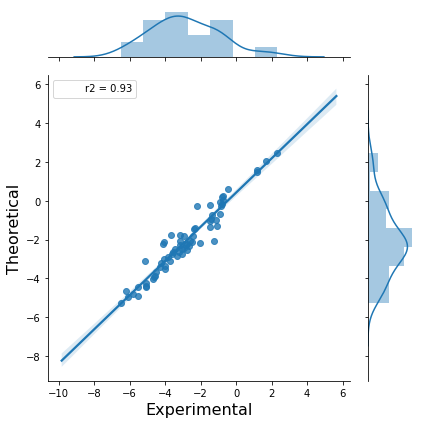

In [660]:
j = sns.jointplot(test_hq['Sol'], test_hq['CalcSol'], kind="reg", stat_func=r2)
j.set_axis_labels('Experimental', 'Theoretical', fontsize=16)
plt.tight_layout()
plt.show()
j.savefig('./solvation_summary/testhq.svg', format='svg', dpi=1200)

In [666]:
np.sqrt(mean_squared_error(compare_use['Sol'], compare_use['CalcSol']))

2.126611301166607

In [667]:
mean_absolute_error(compare_use['Sol'], compare_use['CalcSol'])

1.658447888357349

In [668]:
r2(compare_use['Sol'], compare_use['CalcSol'])

0.8334605000462714

In [694]:
compare_use['diff'] = abs(compare_use['Sol'] - compare_use['CalcSol'])

In [697]:
compare_use[compare_use['diff'] > 2.0].shape

(367, 9)

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


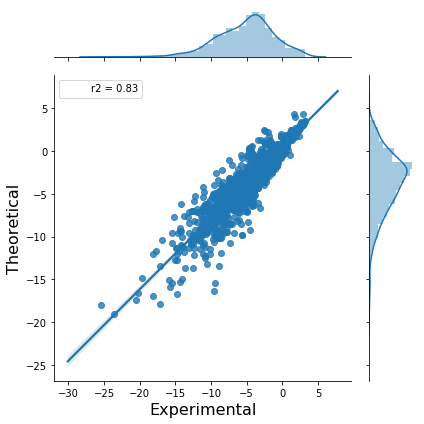

In [684]:
j = sns.jointplot(compare_use['Sol'], compare_use['CalcSol'], kind="reg", stat_func=r2)
j.set_axis_labels('Experimental', 'Theoretical', fontsize=16)
plt.tight_layout()
plt.show()
j.savefig('./solvation_summary/expCalc_all.svg', format='svg', dpi=1200)

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


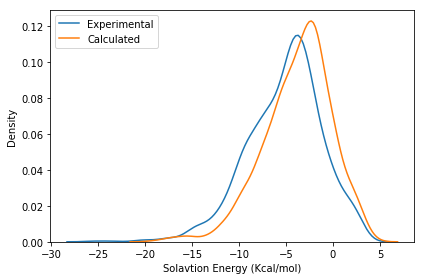

In [683]:
fig, ax = plt.subplots()

j = sns.distplot(compare_use['Sol'], hist=False, ax=ax, label='Experimental')
k = sns.distplot(compare_use['CalcSol'], hist=False, ax=ax, label='Calculated')
ax.set_xlabel('Solavtion Energy (Kcal/mol)', fontsize=10)
ax.set_ylabel('Density', fontsize=10)
plt.tight_layout()
plt.savefig('./solvation_summary/all_expCalc.svg', format='svg', dpi=1200)

In [14]:
freesolExp = pd.read_csv('./freesol_processed_use.csv')

In [5]:
solCalc = pd.read_csv('./solvation_calc.csv')

In [15]:
freesolExp.head()

,SMILES,InChI,Sol,RB,MW
0,CCCCC[N+](=O)[O-],"InChI=1S/C5H11NO2/c1-2-3-4-5-6(7)8/h2-5H2,1H3",-2.82,4,117.078979
1,CCCCCCBr,"InChI=1S/C6H13Br/c1-2-3-4-5-6-7/h2-6H2,1H3",0.18,4,164.020062
2,Nc1ccc(Cl)cc1,"InChI=1S/C6H6ClN/c7-5-1-3-6(8)4-2-5/h1-4H,8H2",-5.90,0,127.018877
3,O=c1[nH]cc(C(F)(F)F)c(=O)[nH]1,"InChI=1S/C5H3F3N2O2/c6-5(7,8)2-1-9-4(12)10-3(2...",-15.46,0,180.014662
4,CCCCOCCCC,"InChI=1S/C8H18O/c1-3-5-7-9-8-6-4-2/h3-8H2,1-2H3",-0.83,6,130.135765


In [16]:
freesolExp.shape

(640, 5)

In [18]:
solCalc.head()

,InChI,CalcSol,Time_x,Time_y
0,InChI=1S/C10H12O3/c1-2-7-13-10(12)8-3-5-9(11)6...,-7.647633,1425.7,190.0
1,InChI=1S/C10H13NO2/c1-3-13-10-6-4-9(5-7-10)11-...,-6.487129,1519.9,196.9
2,"InChI=1S/C10H14NO5PS/c1-3-14-17(18,15-4-2)16-1...",-4.670368,2.0,370.4
3,"InChI=1S/C10H14O/c1-10(2,3)8-4-6-9(11)7-5-8/h4...",-4.093571,1454.5,186.8
4,InChI=1S/C10H20O/c1-3-4-5-6-7-8-9-10(2)11/h3-9...,-1.849460,1293.3,188.2


In [19]:
freesolComb = freesolExp.merge(solCalc, on='InChI')

In [20]:
freesolComb.shape

(607, 8)

In [24]:
freesolComb.head()

,SMILES,InChI,Sol,RB,MW,CalcSol,Time_x,Time_y
0,CCCCC[N+](=O)[O-],"InChI=1S/C5H11NO2/c1-2-3-4-5-6(7)8/h2-5H2,1H3",-2.82,4,117.078979,-2.394082,516.5,104.5
1,CCCCCCBr,"InChI=1S/C6H13Br/c1-2-3-4-5-6-7/h2-6H2,1H3",0.18,4,164.020062,-0.063372,606.4,121.5
2,Nc1ccc(Cl)cc1,"InChI=1S/C6H6ClN/c7-5-1-3-6(8)4-2-5/h1-4H,8H2",-5.90,0,127.018877,-5.431392,413.5,94.7
3,O=c1[nH]cc(C(F)(F)F)c(=O)[nH]1,"InChI=1S/C5H3F3N2O2/c6-5(7,8)2-1-9-4(12)10-3(2...",-15.46,0,180.014662,-9.551648,729.3,122.3
4,CCCCOCCCC,"InChI=1S/C8H18O/c1-3-5-7-9-8-6-4-2/h3-8H2,1-2H3",-0.83,6,130.135765,0.695961,890.7,135.0


In [28]:
np.sqrt(mean_squared_error(freesolComb['Sol'], freesolComb['CalcSol']))

1.7313925428166808

In [30]:
mean_absolute_error(freesolComb['Sol'], freesolComb['CalcSol'])

1.2971184735555517

In [33]:
r2(freesolComb['Sol'], freesolComb['CalcSol'])

0.884936293597269

# 9. CDC dataset

In [35]:
gas = np.load('./ccdc/gas_opt_log.npy')
water = np.load('./ccdc/wat_opt_log.npy')
octa = np.load('./ccdc/oct_smd_log.npy')

In [36]:
gas.shape, water.shape, octa.shape

((39819, 3), (39819,), (39819, 3))

In [37]:
df_gas = pd.DataFrame([i for i in gas], columns=['enerGas', 'Time', 'ID'])
df_wat = pd.DataFrame([i for i in water], columns=['enerGas', 'Time', 'ID'])
df_oct = pd.DataFrame([i for i in octa], columns=['enerGas', 'Time', 'ID'])

In [38]:
df_gas.head()

,enerGas,Time,ID
0,-954.639026042,239.8,43482
1,-1264.34118703,1077.1,356863
2,-686.065589458,637.3,918256
3,-2902.58397934,152.0,500364
4,-884.271643014,3238.8,713242


In [614]:
df_gas['ID'] = df_gas['ID'].astype(float)

In [616]:
gasWat = df_gas.merge(df_wat, on='ID', how='inner')

In [704]:
gasOct = df_gas.merge(df_oct, on='ID', how='inner')

In [621]:
gasWat['Sol'] = 627.509*(gasWat['enerGas_y'].astype(float) - gasWat['enerGas_x'].astype(float))

In [705]:

gasOct['SolOct'] = 627.509*(gasOct['enerGas_y'].astype(float) - gasOct['enerGas_x'].astype(float))



In [622]:
gasWat.head()

,enerGas_x,Time_x,ID,enerGas_y,Time_y,Sol
0,-954.639026042,239.8,43482.0,-954.655475568,114.3,-10.322226
1,-1264.34118703,1077.1,356863.0,-1264.34337634,325.4,-1.373812
2,-686.065589458,637.3,918256.0,-686.075861233,253.4,-6.445631
3,-2902.58397934,152.0,500364.0,-2902.58528538,91.1,-0.819552
4,-884.271643014,3238.8,713242.0,-884.286976312,537.4,-9.621782


In [618]:
ccdc = pd.read_csv('./ccdc/data_consistent_strict_rmrpc.csv')

In [623]:
ccdc['index'] = ccdc['index'].astype(float)

In [624]:
ccdc = ccdc.rename(columns={'index': 'ID'})

In [625]:
gasWatSmi = ccdc.merge(gasWat, on='ID', how='inner')

In [626]:
gasWatSmi.shape

(39818, 13)

In [627]:
gasWatSmi.head()

,ID,SMILES,initial_InChI,initial_SMILES,MMFF_InChI,MMFF_SMILES,QM_InChI,QM_SMILES,enerGas_x,Time_x,enerGas_y,Time_y,Sol
0,308.0,CC(=O)NCCNC(C)=O,InChI=1S/C6H12N2O2/c1-5(9)7-3-4-8-6(2)10/h3-4H...,CC(=O)NCCNC(C)=O,InChI=1S/C6H12N2O2/c1-5(9)7-3-4-8-6(2)10/h3-4H...,CC(=O)NCCNC(C)=O,InChI=1S/C6H12N2O2/c1-5(9)7-3-4-8-6(2)10/h3-4H...,CC(=O)NCCNC(C)=O,-495.851561799,339.6,-495.875408583,124.4,-14.964072
1,1087.0,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,-572.621520495,402.7,-572.650916216,129.2,-18.446079
2,1088.0,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,-572.621520496,403.3,-572.650916163,130.6,-18.446046
3,1091.0,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,-572.621520495,403.0,-572.650916233,136.4,-18.446090
4,1093.0,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...,OC1COC(O)C(O)C1O,-572.619938276,399.1,-572.650498562,132.0,-19.176855


In [628]:
ccdc_use = gasWatSmi[['QM_SMILES', 'ID', 'Sol']]

In [629]:
ccdc_use.head()

,QM_SMILES,ID,Sol
0,CC(=O)NCCNC(C)=O,308.0,-14.964072
1,OC1COC(O)C(O)C1O,1087.0,-18.446079
2,OC1COC(O)C(O)C1O,1088.0,-18.446046
3,OC1COC(O)C(O)C1O,1091.0,-18.446090
4,OC1COC(O)C(O)C1O,1093.0,-19.176855


In [630]:
len(set(ccdc_use['QM_SMILES']))

33572

In [632]:
ccdc_use[ccdc_use['QM_SMILES'] == 'OC1COC(O)C(O)C1O']

,QM_SMILES,ID,Sol
1,OC1COC(O)C(O)C1O,1087.0,-18.446079
2,OC1COC(O)C(O)C1O,1088.0,-18.446046
3,OC1COC(O)C(O)C1O,1091.0,-18.446090
4,OC1COC(O)C(O)C1O,1093.0,-19.176855
5,OC1COC(O)C(O)C1O,1095.0,-19.176868
1630,OC1COC(O)C(O)C1O,458592.0,-16.534565
1631,OC1COC(O)C(O)C1O,458593.0,-17.844913
2517,OC1COC(O)C(O)C1O,738479.0,-19.247018
2518,OC1COC(O)C(O)C1O,738480.0,-19.044987
2519,OC1COC(O)C(O)C1O,738481.0,-19.247018


In [635]:
ccdc_use1 = ccdc_use.groupby('QM_SMILES').min()
ccdc_use1['SMILES'] = ccdc_use1.index
ccdc_use1.index = range(len(ccdc_use1))

In [640]:
ccdc_use1.shape

(33572, 4)

In [638]:
ccdc_use2, ele_ccdc = addInfo(ccdc_use1)

RDKit WARNING: [16:57:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:57:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:57:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:57:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:57:05] WARNING: Charges were rearranged
RDKit WARNING: [16:57:05] WARNING: Charges were rearranged
RDKit WARNING: [16:57:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:57:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:57:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:57:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:57:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:57:05] WARNING: Omitted undefined stereo
RDKit WARNING: [16:57:05] WARNING: Omitted undefined stereo
RDKit WARNING: [09:58:54] WARNING: Charges were rearranged
RDKit WARNING: [09:58:54] WARNING: Charges were rearranged
RDKit WARNING: [09:58:54] WARNING: Charges were rearranged
RDKit WARNING: [09:58:54] WARNING: Charges we

RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:15] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitt

RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitt

RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:16] WARNING: Omitt

RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitt

RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitt

RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:17] WARNING: Omitt

RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitt

RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitt

RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:18] WARNING: Omitt

RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitt

RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:19] WARNING: Omitt

RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitt

RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitt

RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:20] WARNING: Omitt

RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitt

RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitt

RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitt

RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:21] WARNING: Omitt

RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitt

RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitt

RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitt

RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:22] WARNING: Omitt

RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitt

RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitt

RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitt

RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:23] WARNING: Omitt

RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitt

RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitt

RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitt

RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:24] WARNING: Omitt

RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitt

RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:25] WARNING: Omitt

RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitt

RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitt

RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:26] WARNING: Omitt

RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitt

RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitt

RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitt

RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:27] WARNING: Omitt

RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitt

RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:28] WARNING: Omitt

RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitt

RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitt

RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:29] WARNING: Omitt

RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitt

RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:30] WARNING: Omitt

RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitt

RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:31] WARNING: Omitt

RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitt

RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:32] WARNING: Omitt

RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitt

RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:33] WARNING: Omitt

RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitt

RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:34] WARNING: Omitt

RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitt

RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:35] WARNING: Omitt

RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitt

RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitt

RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:36] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitt

RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:37] WARNING: Omitt

RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitt

RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitt

RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:38] WARNING: Omitt

RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitt

RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitt

RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitt

RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:39] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitt

RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitt

RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:40] WARNING: Omitt

RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitt

RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitt

RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:41] WARNING: Omitt

RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitt

RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitted undefined stereo
RDKit WARNING: [19:39:42] WARNING: Omitt

In [639]:
ccdc_use2.shape

(33572, 7)

In [641]:
ele_ccdc

{'Br', 'C', 'Cl', 'F', 'N', 'O', 'P', 'S'}

In [643]:
ccdc_use2.head()

,ID,Sol,SMILES,Mol,InChI,RB,MW
0,636264.0,1.433331,BrC#Cc1cc(C#CBr)cc(C#CBr)c1,<rdkit.Chem.rdchem.Mol object at 0x1a3ba48ee0>,InChI=1S/C12H3Br3/c13-4-1-10-7-11(2-5-14)9-12(...,0,383.778486
1,636252.0,0.521259,BrC#Cc1ccc(C#CBr)cc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb5fa30>,InChI=1S/C10H4Br2/c11-7-5-9-1-2-10(4-3-9)6-8-1...,0,281.867974
2,422494.0,-2.894046,BrC(=C(Br)c1ccccc1)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb5f300>,InChI=1S/C14H10Br2/c15-13(11-7-3-1-4-8-11)14(1...,2,335.914925
3,976673.0,-2.203335,BrC(=CC=C(Br)c1ccccc1)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb6d530>,InChI=1S/C16H12Br2/c17-15(13-7-3-1-4-8-13)11-1...,3,361.930575
4,295672.0,-2.494662,BrC(Br)(Br)C(Br)(Br)Br,<rdkit.Chem.rdchem.Mol object at 0x1a3bb6d0d0>,"InChI=1S/C2Br6/c3-1(4,5)2(6,7)8",0,497.510023


In [644]:
ccdc_use2[pd.isnull(ccdc_use2['InChI'])].shape

(0, 7)

In [645]:
len(set(ccdc_use2['InChI']))

33568

In [652]:
ccdc_use3 = ccdc_use2[~ccdc_use2.duplicated('InChI', False)].reset_index(drop=True)

In [653]:
ccdc_use3.shape

(33564, 7)

In [654]:
getStats(ccdc_use3)

,ID,Sol,RB,MW
mean,483378.776070,-8.683580,1.934871,237.359206
std,286456.898697,4.352450,1.660372,52.876337
min,33.000000,-35.206455,0.000000,28.031300
max,994424.000000,8.435233,17.000000,751.346697


/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


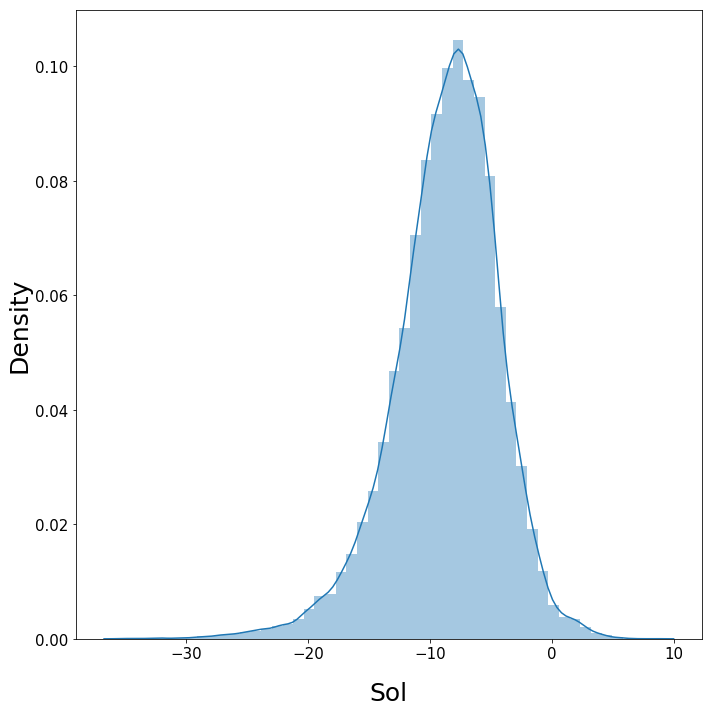

In [655]:
getFigs(ccdc_use3, 'Sol')

In [698]:
ccdc_use3.to_csv('./ccdc/ccdc_processed.csv', index=False)

In [706]:
ccdc_use3.head()

,ID,Sol,SMILES,Mol,InChI,RB,MW
0,636264.0,1.433331,BrC#Cc1cc(C#CBr)cc(C#CBr)c1,<rdkit.Chem.rdchem.Mol object at 0x1a3ba48ee0>,InChI=1S/C12H3Br3/c13-4-1-10-7-11(2-5-14)9-12(...,0,383.778486
1,636252.0,0.521259,BrC#Cc1ccc(C#CBr)cc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb5fa30>,InChI=1S/C10H4Br2/c11-7-5-9-1-2-10(4-3-9)6-8-1...,0,281.867974
2,422494.0,-2.894046,BrC(=C(Br)c1ccccc1)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb5f300>,InChI=1S/C14H10Br2/c15-13(11-7-3-1-4-8-11)14(1...,2,335.914925
3,976673.0,-2.203335,BrC(=CC=C(Br)c1ccccc1)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb6d530>,InChI=1S/C16H12Br2/c17-15(13-7-3-1-4-8-13)11-1...,3,361.930575
4,295672.0,-2.494662,BrC(Br)(Br)C(Br)(Br)Br,<rdkit.Chem.rdchem.Mol object at 0x1a3bb6d0d0>,"InChI=1S/C2Br6/c3-1(4,5)2(6,7)8",0,497.510023


In [708]:
gasOct['ID'] = gasOct['ID'].astype(float)

In [709]:
ccdc_logp = ccdc_use3.merge(gasOct, on='ID', how='inner')

In [710]:
ccdc_logp.head()

,ID,Sol,SMILES,Mol,InChI,RB,MW,enerGas_x,Time_x,enerGas_y,Time_y,SolOct
0,636264.0,1.433331,BrC#Cc1cc(C#CBr)cc(C#CBr)c1,<rdkit.Chem.rdchem.Mol object at 0x1a3ba48ee0>,InChI=1S/C12H3Br3/c13-4-1-10-7-11(2-5-14)9-12(...,0,383.778486,-8173.97801470,762.1,-8173.98702426,251.1,-5.653580
1,636252.0,0.521259,BrC#Cc1ccc(C#CBr)cc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb5fa30>,InChI=1S/C10H4Br2/c11-7-5-9-1-2-10(4-3-9)6-8-1...,0,281.867974,-5526.73677617,387.8,-5526.74504474,169.6,-5.188602
2,422494.0,-2.894046,BrC(=C(Br)c1ccccc1)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb5f300>,InChI=1S/C14H10Br2/c15-13(11-7-3-1-4-8-11)14(1...,2,335.914925,-5682.90435007,1099.5,-5682.92054715,324.2,-10.163813
3,976673.0,-2.203335,BrC(=CC=C(Br)c1ccccc1)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb6d530>,InChI=1S/C16H12Br2/c17-15(13-7-3-1-4-8-13)11-1...,3,361.930575,-5760.32478192,1488.9,-5760.34074132,382.7,-10.014667
4,295672.0,-2.494662,BrC(Br)(Br)C(Br)(Br)Br,<rdkit.Chem.rdchem.Mol object at 0x1a3bb6d0d0>,"InChI=1S/C2Br6/c3-1(4,5)2(6,7)8",0,497.510023,-15506.4096210,169.8,-15506.4233993,120.3,-8.646007


In [711]:
ccdc_logp['logp'] = ccdc_logp['Sol'] - ccdc_logp['SolOct']

In [712]:
from rdkit.Chem.Crippen import MolLogP

In [713]:
ccdc_logp['XLogP'] = ccdc_logp['SMILES'].apply(lambda x: MolLogP(Chem.MolFromSmiles(x)))

In [714]:
ccdc_logp

,ID,Sol,SMILES,Mol,InChI,RB,MW,enerGas_x,Time_x,enerGas_y,Time_y,SolOct,logp,XLogP
0,636264.0,1.433331,BrC#Cc1cc(C#CBr)cc(C#CBr)c1,<rdkit.Chem.rdchem.Mol object at 0x1a3ba48ee0>,InChI=1S/C12H3Br3/c13-4-1-10-7-11(2-5-14)9-12(...,0,383.778486,-8173.97801470,762.1,-8173.98702426,251.1,-5.653580,7.086911,3.7983
1,636252.0,0.521259,BrC#Cc1ccc(C#CBr)cc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb5fa30>,InChI=1S/C10H4Br2/c11-7-5-9-1-2-10(4-3-9)6-8-1...,0,281.867974,-5526.73677617,387.8,-5526.74504474,169.6,-5.188602,5.709861,3.0944
2,422494.0,-2.894046,BrC(=C(Br)c1ccccc1)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb5f300>,InChI=1S/C14H10Br2/c15-13(11-7-3-1-4-8-11)14(1...,2,335.914925,-5682.90435007,1099.5,-5682.92054715,324.2,-10.163813,7.269767,5.3022
3,976673.0,-2.203335,BrC(=CC=C(Br)c1ccccc1)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb6d530>,InChI=1S/C16H12Br2/c17-15(13-7-3-1-4-8-13)11-1...,3,361.930575,-5760.32478192,1488.9,-5760.34074132,382.7,-10.014667,7.811332,5.8584
4,295672.0,-2.494662,BrC(Br)(Br)C(Br)(Br)Br,<rdkit.Chem.rdchem.Mol object at 0x1a3bb6d0d0>,"InChI=1S/C2Br6/c3-1(4,5)2(6,7)8",0,497.510023,-15506.4096210,169.8,-15506.4233993,120.3,-8.646007,6.151345,4.6634
5,890114.0,-3.743719,BrC(Br)(Br)CC1(Br)CC1Sc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x1a3bb6d990>,"InChI=1S/C11H10Br4S/c12-10(7-11(13,14)15)6-9(1...",3,489.723670,-11110.1618130,1752.1,-11110.1809189,462.2,-11.989124,8.245406,5.9133
6,907613.0,-3.336967,BrC(Br)(Br)c1ccc(C(Br)(Br)Br)cc1,<rdkit.Chem.rdchem.Mol object at 0x1a3ba25f30>,"InChI=1S/C8H4Br6/c9-7(10,11)5-1-2-6(4-3-5)8(12...",0,573.541323,-15737.4679336,954.4,-15737.4862764,344.3,-11.510272,8.173305,6.2766
7,955248.0,-1.993257,BrC(Br)=C(C#Cc1ccccc1)C#Cc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x1a3ba25ad0>,InChI=1S/C18H10Br2/c19-18(20)17(13-11-15-7-3-1...,0,383.914925,-5835.21533046,1618.6,-5835.23244268,428.4,-10.738072,8.744815,5.0912
8,923527.0,-3.359181,BrC(Br)=C1C2C3C(=C(Br)Br)C4C2C2C1C3C42,<rdkit.Chem.rdchem.Mol object at 0x1a3b9f1350>,InChI=1S/C12H8Br4/c13-11(14)9-5-1-2-4(5)8-7(9)...,0,467.735949,-10748.7939884,1408.0,-10748.8125608,435.2,-11.654348,8.295167,4.9868
9,264971.0,-1.238383,BrC(Br)=C1C2C3CC4C5CC(C1C53)C42,<rdkit.Chem.rdchem.Mol object at 0x1a3b9f1440>,InChI=1S/C12H12Br2/c13-12(14)11-9-5-1-3-4-2-6(...,0,313.930575,-5607.87073258,1256.0,-5607.88417460,395.6,-8.434989,7.196606,3.7656


In [717]:
r2(ccdc_logp['logp'], ccdc_logp['XLogP'])

0.7304767932309444

In [719]:
np.sqrt(mean_squared_error(ccdc_logp['logp'], ccdc_logp['XLogP']))

1.3924092498433478

In [720]:
ccdc_logp[['SMILES', 'InChI', 'Sol', 'logp', 'ID']].to_csv('./ccdcSolLogP.csv', index=False)